<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Проведем-исследовательский-анализ-данных" data-toc-modified-id="Проведем-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проведем исследовательский анализ данных</a></span></li><li><span><a href="#Составим-портрет-пользователя-каждого-региона" data-toc-modified-id="Составим-портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составим портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверим-гипотезы" data-toc-modified-id="Проверим-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверим гипотезы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Сборный проект # 1 - установление закономерностей, определяющих успешность компьютерной игры

Необходимо исследовать доступные из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Наша задача - выявить закономерности (факторы), определяющие успешность компьютерной игры** для интернет-магазина «Стримчик», который продаёт компьютерные игры по всему миру. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

### Откроем файл с данными и изучим общую информацию

- **Импортируем нужные библиотеки;**
- **Загрузим данные из файла в датафрейм и сохраним в переменную `data`;**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
data = pd.read_csv('/datasets/games.csv')

- **Выведем первые 5 строчек датафрейма `data` на экран;**

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- **Выведем основную информацию о датафрейме `data` с помощью метода info();**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** Датафрейм содержит 16715 строчек. У целого ряда столбцов есть пропущенные значения и некорректный тип данных, это необходимо будет обработать на этапе подготовки данных.

### Подготовка данных

- **Заменим названия столбцов (приведем к нижнему регистру);**

In [ ]:
# приведем названия столбцов к нижнему регистру

data.columns = data.columns.str.lower()

# проверим результат

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

- **Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;**
- **Обработаем пропуски при необходимости:**

    - Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишем причины, которые могли привести к пропускам;
    - Обратим внимание **на аббревиатуру 'tbd' в столбце с оценкой пользователей**. Отдельно разберем это значение и опишем, как его обработать;

In [ ]:
# посмотрим на количество пропущенных значений для каждого столбца в целом

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
# посмотрим на типы данных для каждого столбца в целом

data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**Вывод:**

- Рассмотрим поочередно столбцы с пропущенными значениями и с некорректным типом данных:

     - `name`
     - `year_of_release`
     - `genre`
     - `critic_score`
     - `user_score`
     - `rating`

In [ ]:
# напишем функцию, которая поможет автоматизировать проверку каждой колонки

def review_column(column):

    print(f'Тип данных в столбце: {data.dtypes[column]}')
    print(f'Доля пропущенных значений: {data[column].isna().mean():.3%}')
    print('Уникальные значения столбца', column)
    print(data[column].unique())

 - **Столбец `name` - название игры**

In [ ]:
# применим функцию review_column к столбцу

review_column('name')

Тип данных в столбце: object
Доля пропущенных значений: 0.012%
Уникальные значения столбца name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


In [ ]:
# посмотрим на пустые значения в столбце

data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Вывод:**
- Тип данных соответствует значениям столбца;
- В столбце **пропущено 0,012% значений**. Скорее всего пропуски полностью случайные, и данные случайно пропустили при заполнении, название двух игр пропущено на одной и той же игровой платформе GEN. **Так как доля пропущенных значений очень мала, менее 5%, мы можем удалить строки с пропущенными значениями, учитывая также, что дополнить значения точными данными не представляется возможным;**
- Мы видим, что пропущенные значения у столбца `name` и `genre` совпадают, соответственно удалив пропуски в одном столбце, удалим и в другом;

In [ ]:
# удалим строки с NaN

data.dropna(subset=['name'], inplace=True)

- **Столбец `year_of_release` - год выпуска**

In [ ]:
# применим функцию review_column к столбцу

review_column('year_of_release')

Тип данных в столбце: float64
Доля пропущенных значений: 1.610%
Уникальные значения столбца year_of_release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


**Вывод:**
- Столбец необходимо привести к типу данных `int` для удобства в исследовании, а также, потому что год всегда записывается целочисленным значением.
- В столбце **пропущено 1.6% значений**. Скорее всего пропуски случайные, и, возможно, при заполнении год выпуска игр пропустили из-за отсутствия информации. **Так как доля пропущенных значений очень мала, менее 5%, мы можем удалить строки с пропущенными значениями, учитывая также, что дополнить значения точными данными не представляется возможным;**

In [ ]:
# удалим сначала строки с NaN

data.dropna(subset=['year_of_release'], inplace=True)

In [ ]:
# приведем столбец к типу 'int'

data['year_of_release'] = data['year_of_release'].astype(int)

- **Столбец `genre` - жанр игры**

In [ ]:
# применим функцию review_column к столбцу

review_column('genre')

Тип данных в столбце: object
Доля пропущенных значений: 0.000%
Уникальные значения столбца genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


**Вывод:**
- Тип данных соответствует значениям столбца;
- В столбце **нет пропущенных значений**, так как мы уже удалили совпадающие пропуски в столбце `name`;

- **Столбец `critic_score` - оценка критиков (максимум 100)**

In [ ]:
# применим функцию review_column к столбцу

review_column('critic_score')

Тип данных в столбце: float64
Доля пропущенных значений: 51.453%
Уникальные значения столбца critic_score
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


**Вывод:**
- Тип данных соответствует значениям столбца;
- В столбце **пропущен 51% значений**. Мы можем предположить, что пропуски в оценке критиков могут быть обусловлены тем, что некоторые игры просто не были оценены критиками в связи с годом выпуска (до 1994 года) или, наоборот, еще не получили свою оценку. **Оставим пустые значения NaN, чтобы не заполнять данные синтетическими значениями (а именно, медианными значениями столбца), только заменим NaN на нулевые значения, чтобы в исследовательском анализе данных отделять эти значения**;

In [ ]:
data['critic_score'] = data['critic_score'] .fillna(0)

- **Столбец `user_score` - оценка пользователей (максимум 10)**

In [ ]:
# применим функцию review_column к столбцу

review_column('user_score')

Тип данных в столбце: object
Доля пропущенных значений: 40.167%
Уникальные значения столбца user_score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


**Вывод:**
- Столбец необходимо привести к типу `float`, так как оценка пользователя это количественная переменная;
- В столбце **пропущено 40% значений**. Мы можем предположить, что пропуски в оценке пользователей, также как и критиков, могут быть обусловлены тем, что некоторые игры просто не были оценены пользователями, или еще не получили свою оценку от пользователей;
- Обратим внимание на аббревиатуру 'tbd'.

*TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.*

Таким образом, **так как данная аббревиатура служит для отметки неясностей, заменим ее на NaN**.

- **Оставим пустые значения NaN, чтобы не заполнять данные синтетическими значениями (а именно, медианными значениями столбца), только заменим NaN на нулевые значения, чтобы в исследовательском анализе данных отделять эти значения**.

In [ ]:
# приведем столбец к вещественному типу
# и добавим параметр errors='coerce', чтобы принудительно заменить на NaN аббревиатуру 'tbd'

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# проверим, что получилось

data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [ ]:
data['user_score'] = data['user_score'] .fillna(0)

- **Столбец `rating` - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию**

In [ ]:
# применим функцию review_column к столбцу

review_column('rating')

Тип данных в столбце: object
Доля пропущенных значений: 40.598%
Уникальные значения столбца rating
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


**Вывод:**
- Тип данных соответствует значениям столбца;
- В столбце **пропущено 40.6% значений**. Мы можем предположить, что пропуски обусловлены тем, что играм, выпущенным до 1994 года, не был присвоен рейтинг. **Оставим пустые значения NaN, чтобы не заполнять данные синтетическими значениями, учитывая, что дополнить пропуски точными значениями не представляется возможным, только заменим NaN на значения 'unknown', чтобы учитывать игры без рейтинга в исследовательском анализе**;

*ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.*

- В столбце значения 'K-A' - *это игры с рейтингом K-A содержат контент, подходящий для людей в возрасте от 6 лет и старше. Этот рейтинг был отменен в пользу рейтинга E в 1997 году.*

*Подробнее [на Wiki](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)*

In [ ]:
data['rating'] = data['rating'] .fillna('unknown')

In [ ]:
# проверим наличие явных дубликатов в данных датафрейма

data.duplicated().sum()

0

In [ ]:
# проверим, что получилось

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод:**
Данные подготовлены к следующему этапу - исследовательскому анализу.
В результате обработки пропусков, мы удалили около 2% данных.

- **Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец;**

In [ ]:
# создадим новый столбец 'all_regions_total_sales'
# и посчитаем в нем суммарные продажи по столбцам 'na_sales', 'eu_sales','jp_sales', 'other_sales'

data['all_regions_total_sales'] = data[['na_sales', 'eu_sales','jp_sales', 'other_sales',]].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,unknown,0.01


### Проведем исследовательский анализ данных

- **Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [ ]:
# создадим новую переменную count_of_games_released, в которой сгруппируем датафрейм с информацией о играх по году выпуска
# и затем применим метод agg для подсчёта количества выпущенных игр

count_of_games_released = data.groupby('year_of_release').agg({'name': 'count'})


# изменим название колонки на count_of_games

count_of_games_released.columns = ['count_of_games']


# отсортируем таблицу по столбцу count_of_games в порядке от большего количества выпущенных игр

count_of_games_released.sort_values(by='count_of_games', ascending=False)

,count_of_games
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


In [ ]:
# улучшение четкости изображения на графике

%config InlineBackend.figure_format = 'retina'

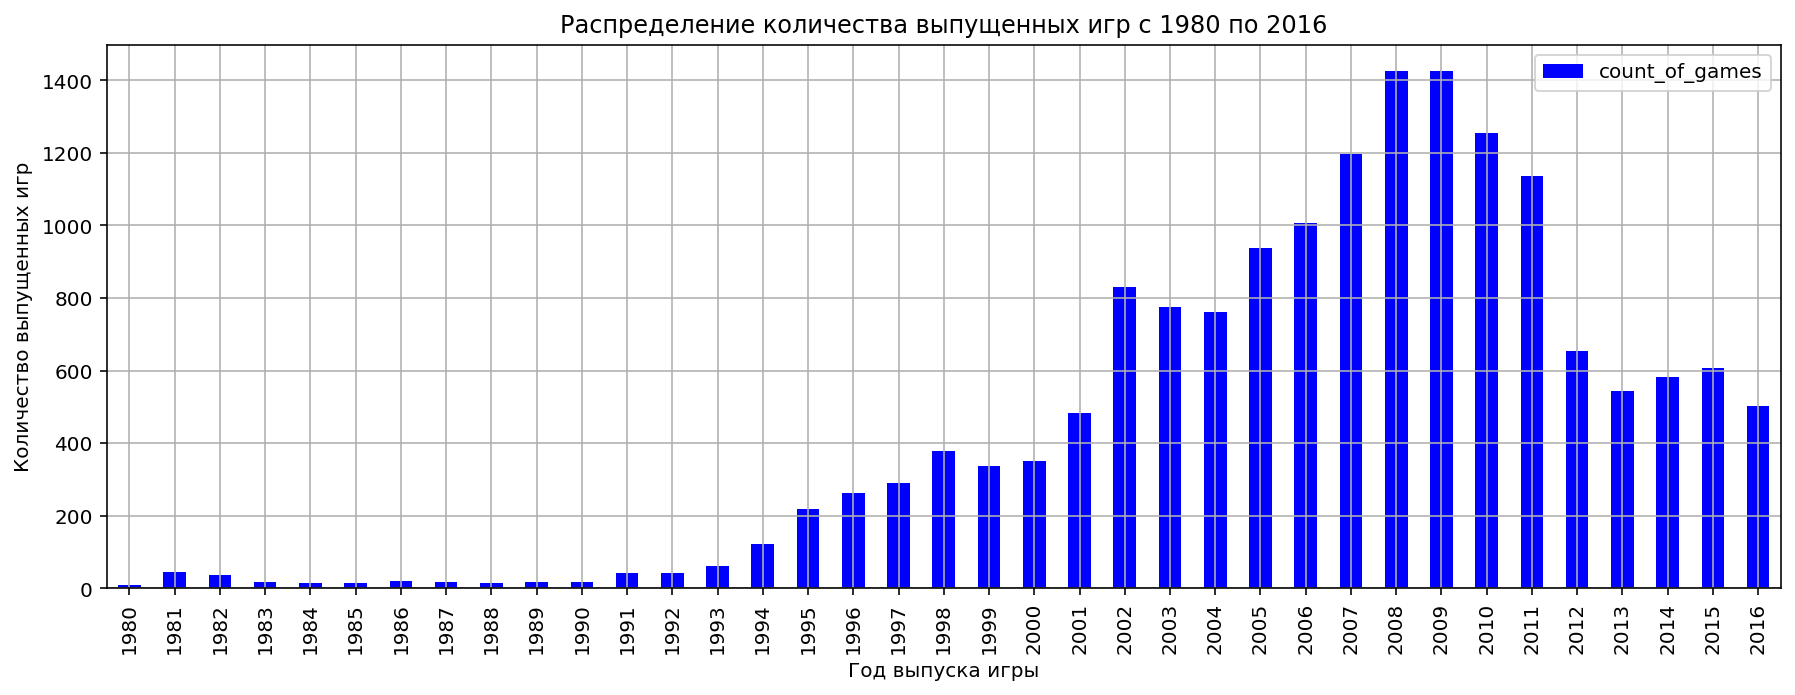

In [ ]:
# построим график распределения количества игр по году выпуска

count_of_games_released.plot(
    y='count_of_games',
    kind='bar',
    figsize=(15, 5),
    alpha=1,
    legend=True,
    color='blue',
    grid=True,
    title='Распределение количества выпущенных игр с 1980 по 2016',
    xlabel='Год выпуска игры',
    ylabel='Количество выпущенных игр'
);

**Вывод:**

Мы наблюдаем, что **рост выпуска игр начинается только с 1994 года**.
*История компьютерных игр рассказывает нам, что начиная с 90-х бум компьютерных игр стал только набирать обороты, индустрия получила толчок к интенсивному росту, а 1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Начало XXI века для игровой индустрии было настоящей золотой эпохой. С 2005 по 2009 год индустрия росла на 10% ежегодно.*
**Пик выпуска игр приходится на 2008-2009 годы. С 2009 года идёт постепенное снижение количества выпускаемых игр, резкий спад релиза пришелся на 2012 год.** Возможно это связано с развитием мобильных игр в приложениях смартфонов и ростом популярности социальных сетей, особенно после выхода iphone(первая модель вышла в 2007 году).
*Подробнее [на DTF](https://dtf.ru/gameindustry/65407-igrovaya-industriya-i-finansovyy-krizis-2008-goda?ysclid=le85g3sqwd356792088rd)*

Для нашего анализа важно оставить данные за самые актуальные периоды для планирования кампании и прогнозирования продаж на 2017-й год.

 - **Посмотрим, как менялись продажи по платформам;**

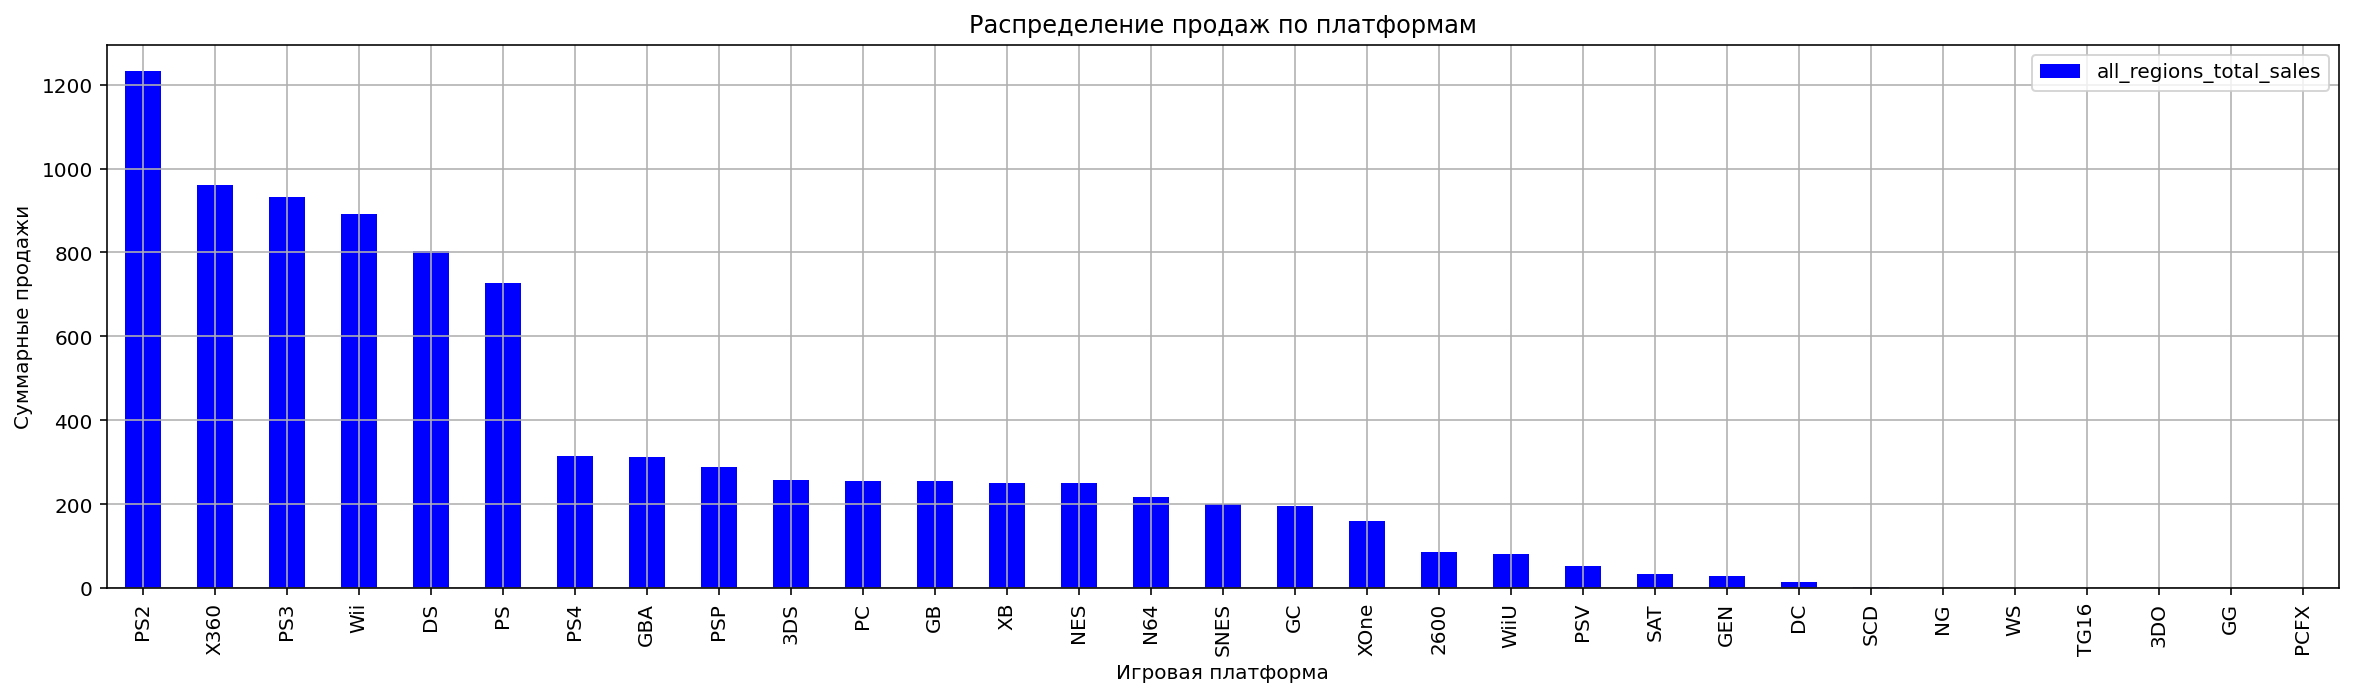

In [ ]:
# создадим новую переменную total_sales_platform,
# в которой сгруппируем датафрейм с информацией о суммарных глобальных продажах по игровым платформам

total_sales_platform = (data
                           .groupby('platform').agg({'all_regions_total_sales': 'sum'})
                           .sort_values(by='all_regions_total_sales', ascending=False)
                           .plot(
                               y='all_regions_total_sales',
                               kind='bar',
                               figsize=(20, 5),
                               alpha=1,
                               grid=True,
                               color='blue',
                               title='Распределение продаж по платформам',
                               xlabel='Игровая платформа',
                               ylabel='Суммарные продажи')
)


**Вывод:**
Можем сделать вывод, что лидерами по продажам за всю историю наблюдений являются платформы **PS2, X360, PS3, Wii, DS и PS**,  **самая популярная платформа - PS2**.

 - **Выберем платформы с наибольшими суммарными продажами и построем распределение по годам;**
 - **За какой характерный срок появляются новые и исчезают старые платформы?**

In [ ]:
# сформируем top-10 платформ по суммарным глобальным продажам

top_10_platforms = (data
                    .pivot_table(index='platform', values='all_regions_total_sales', aggfunc='sum')
                    .sort_values(by='all_regions_total_sales', ascending=False).index.values[:10]
                   )

top_10_platforms


array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

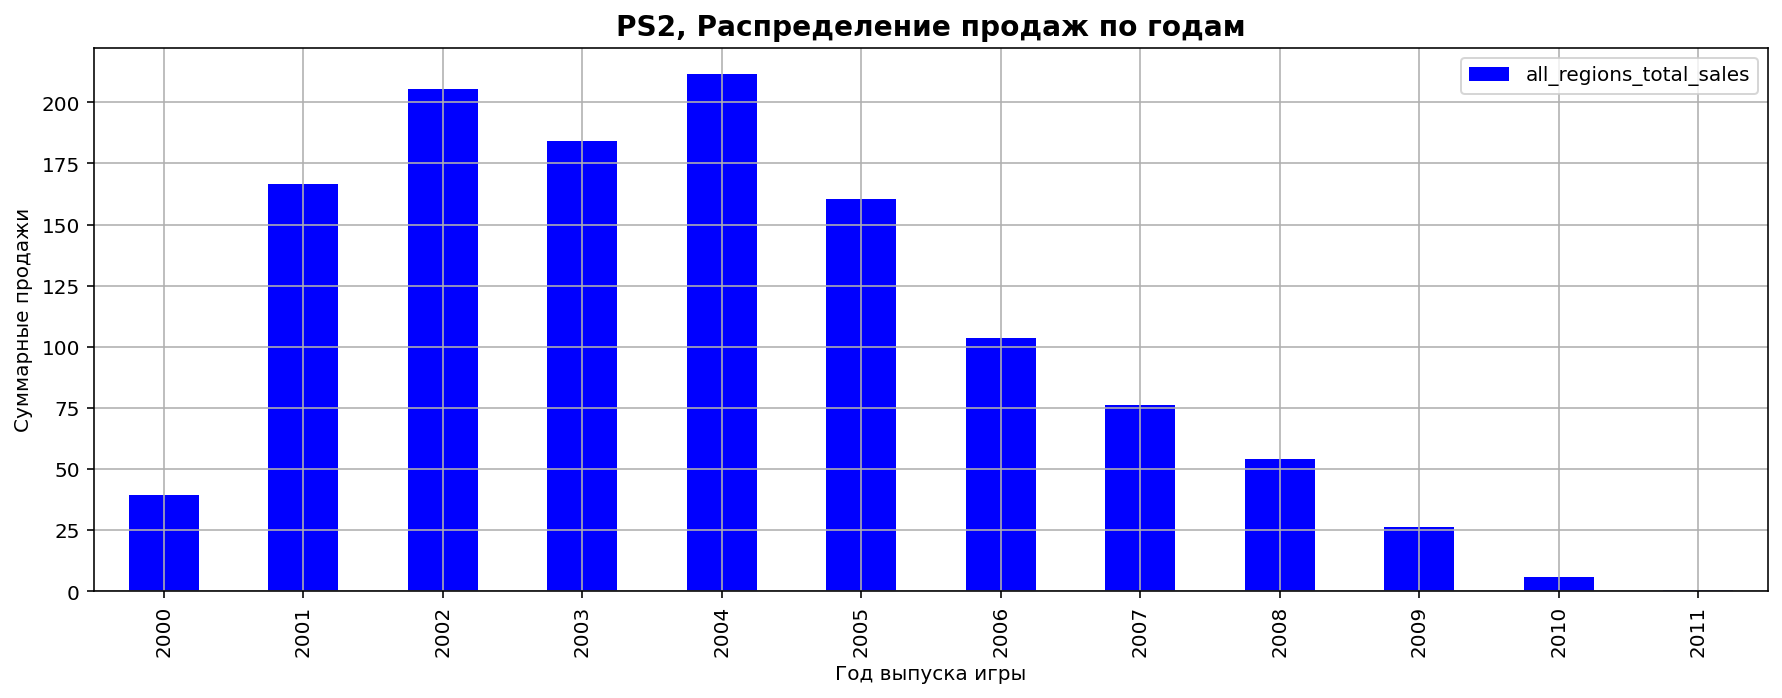

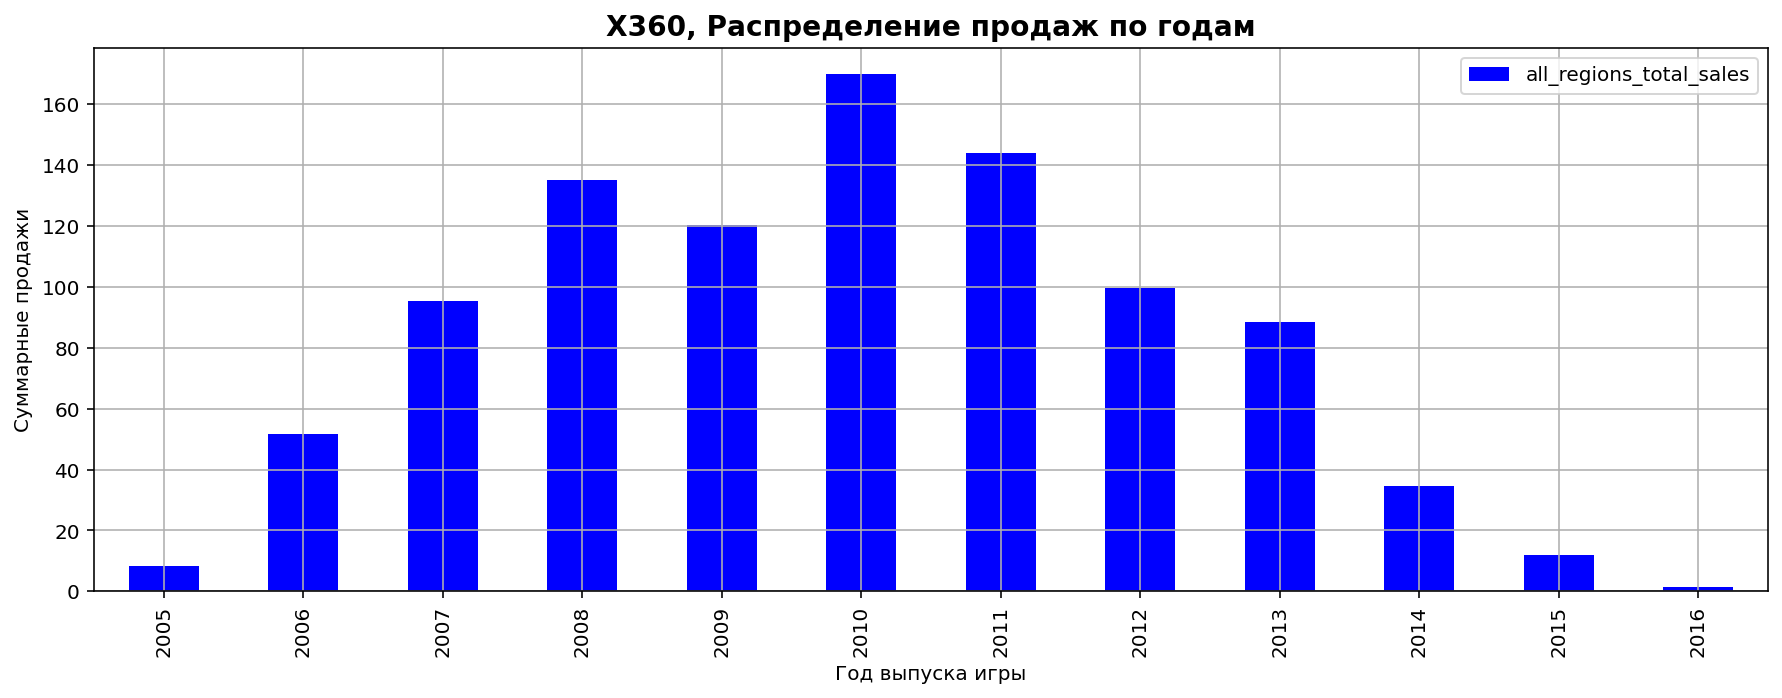

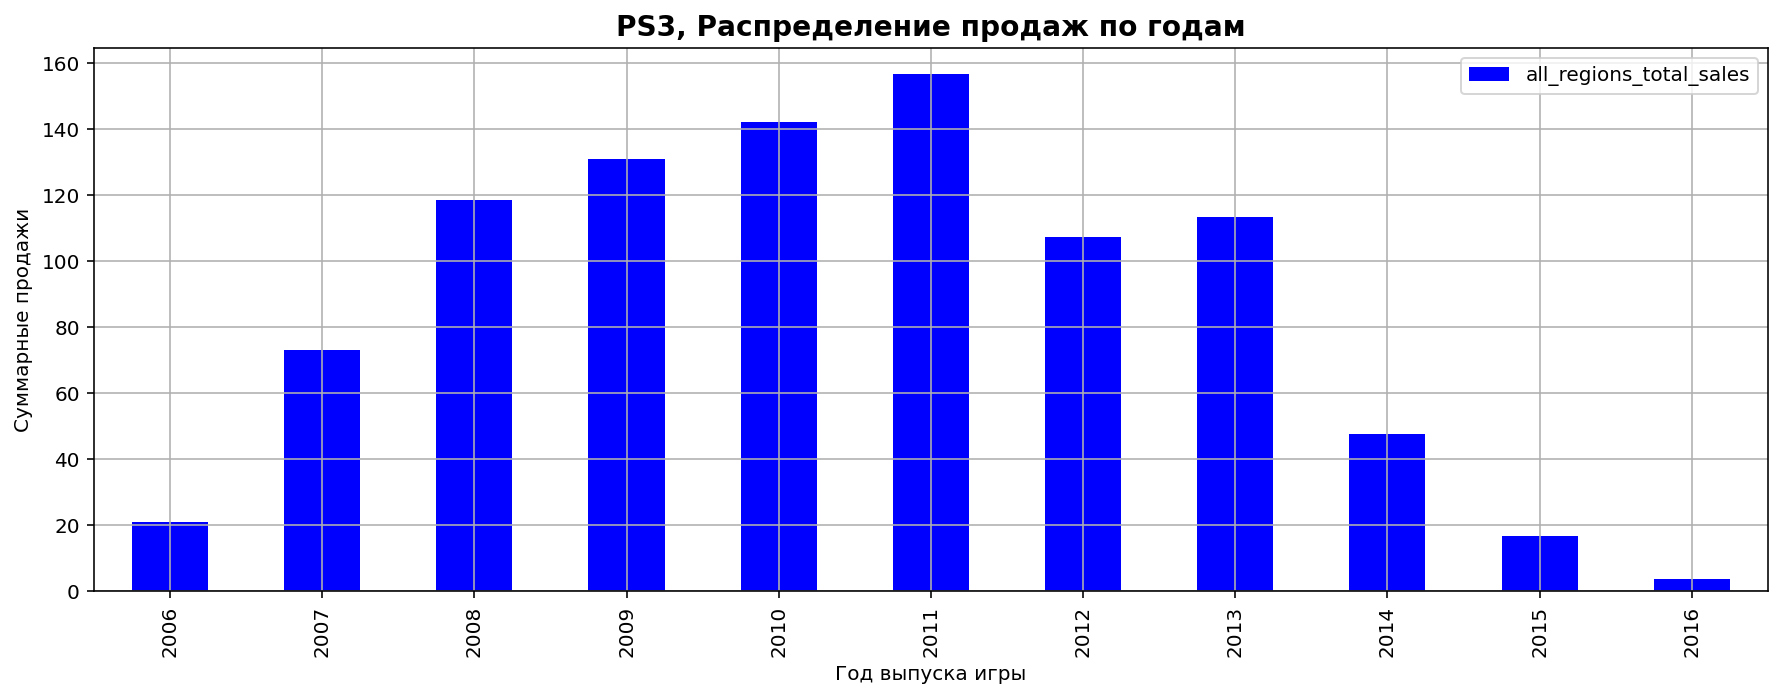

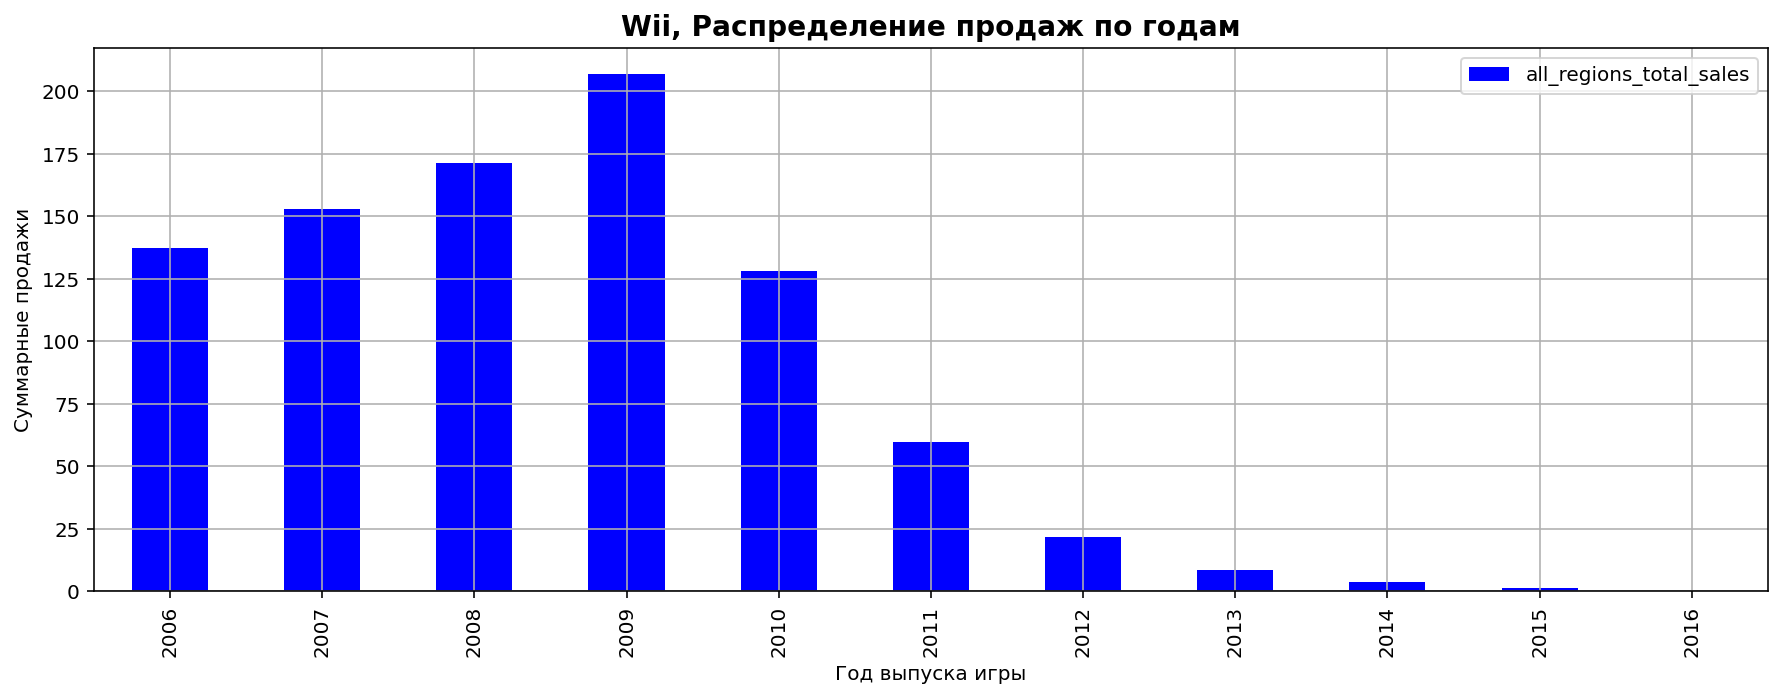

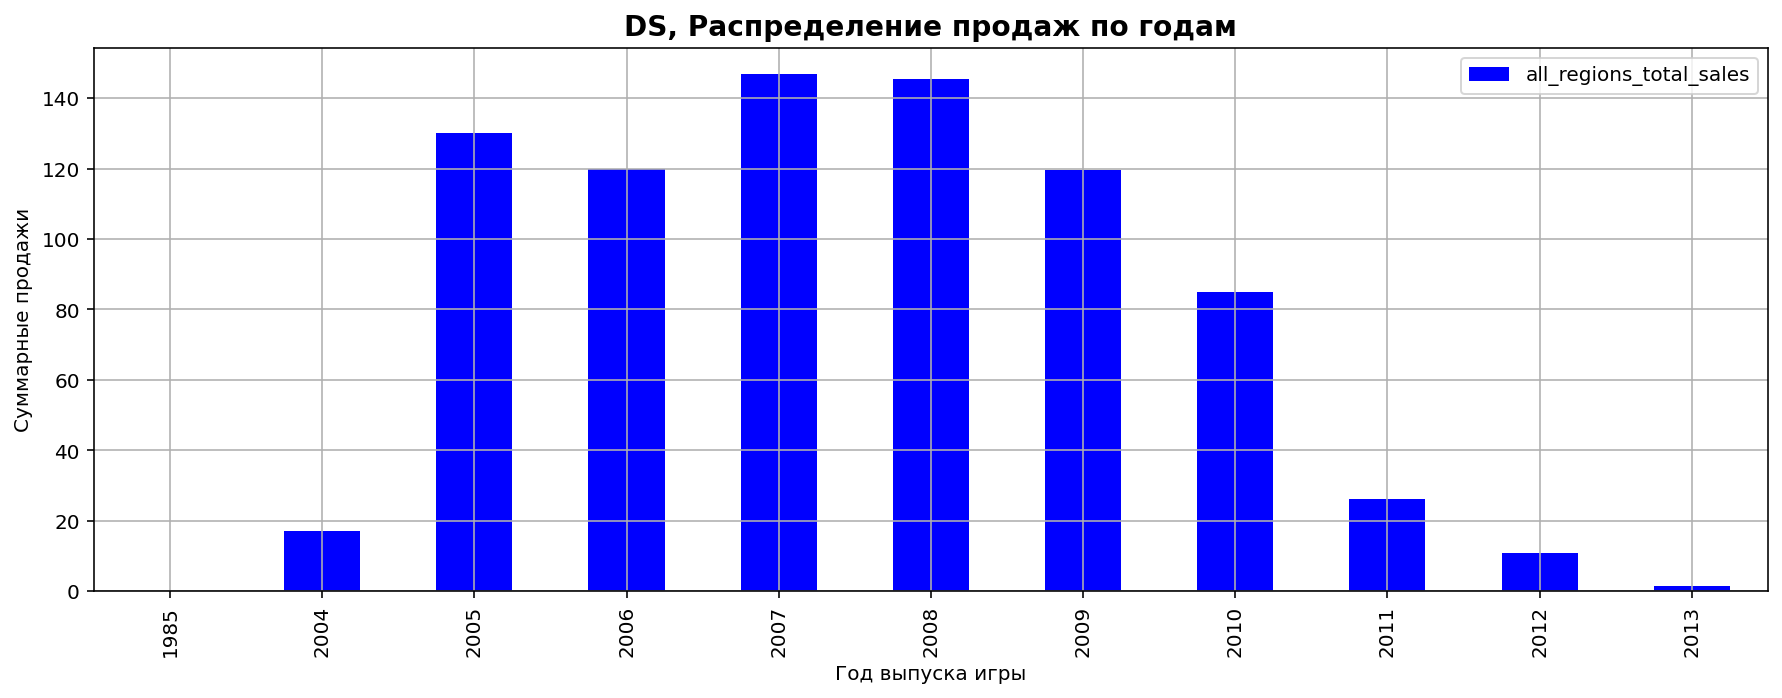

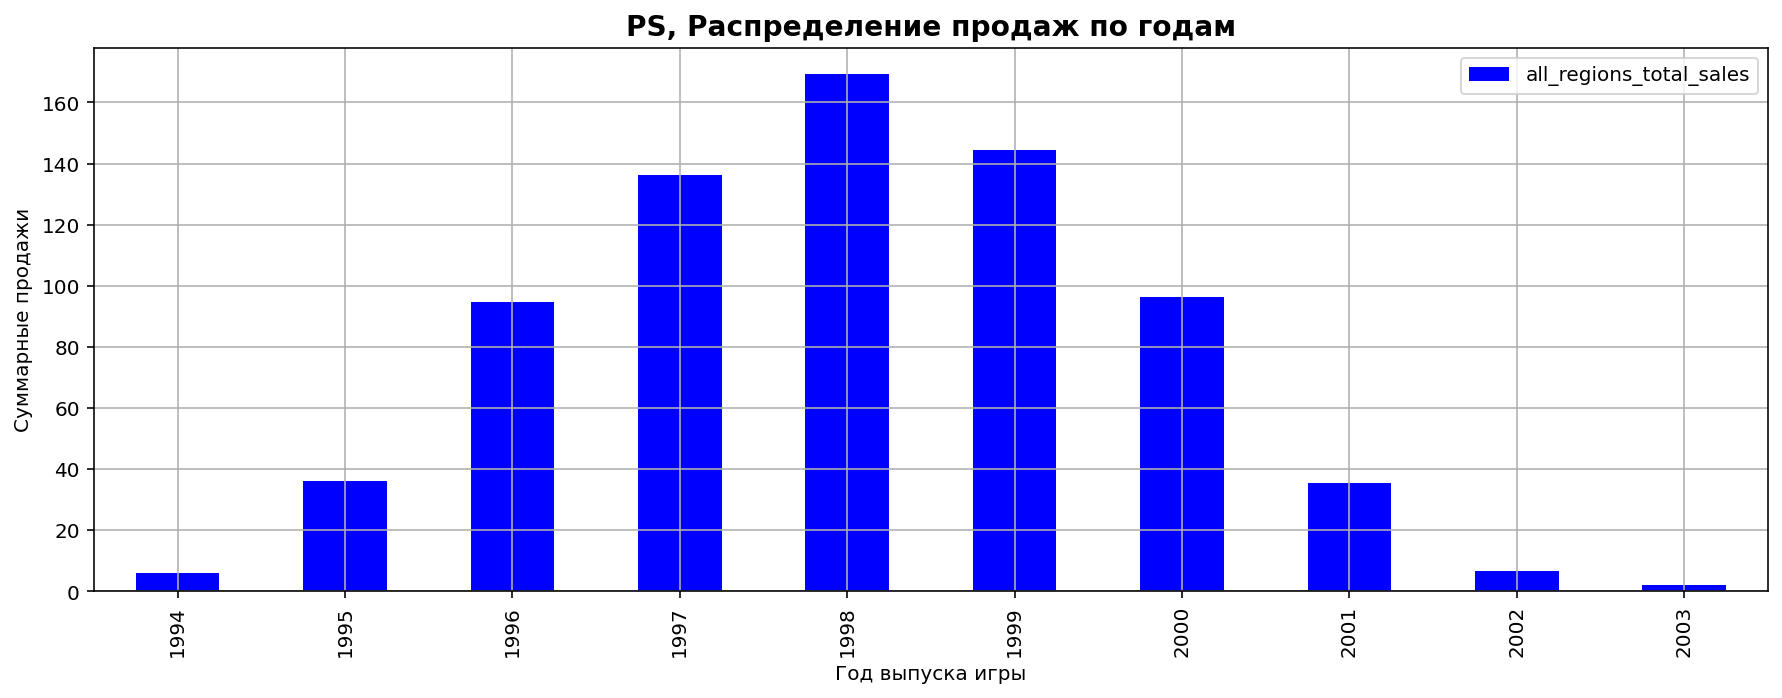

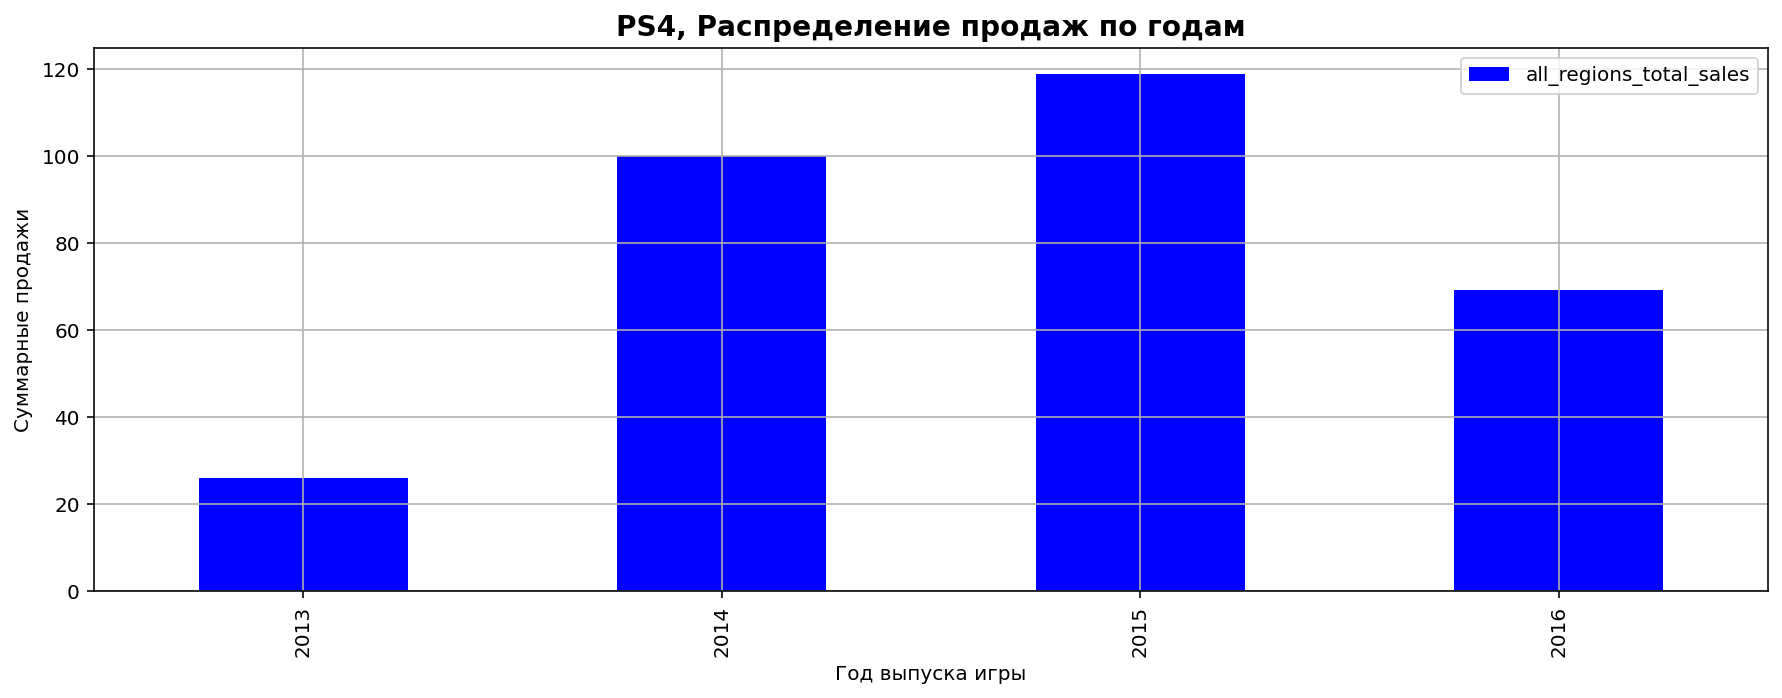

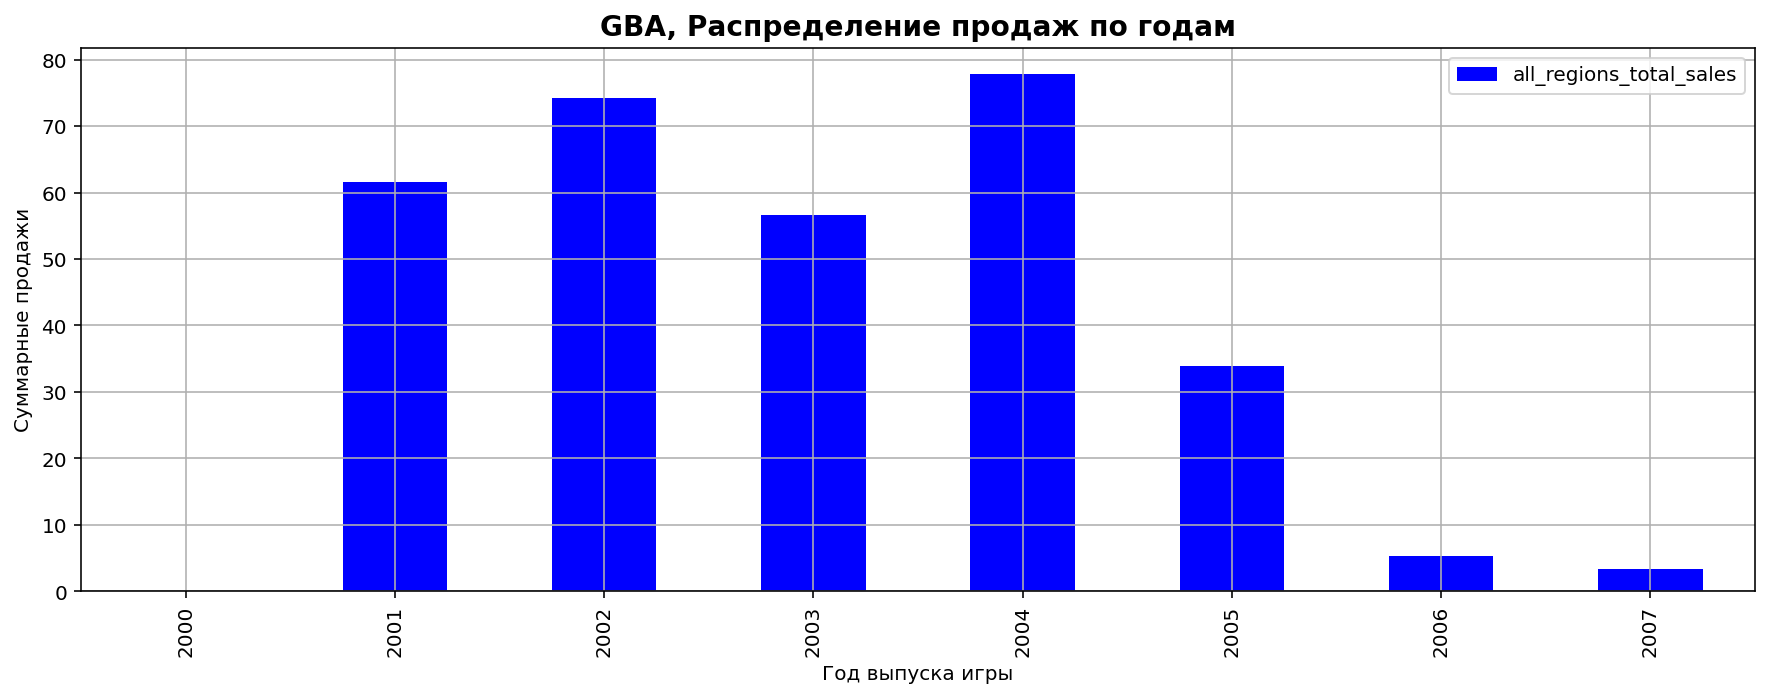

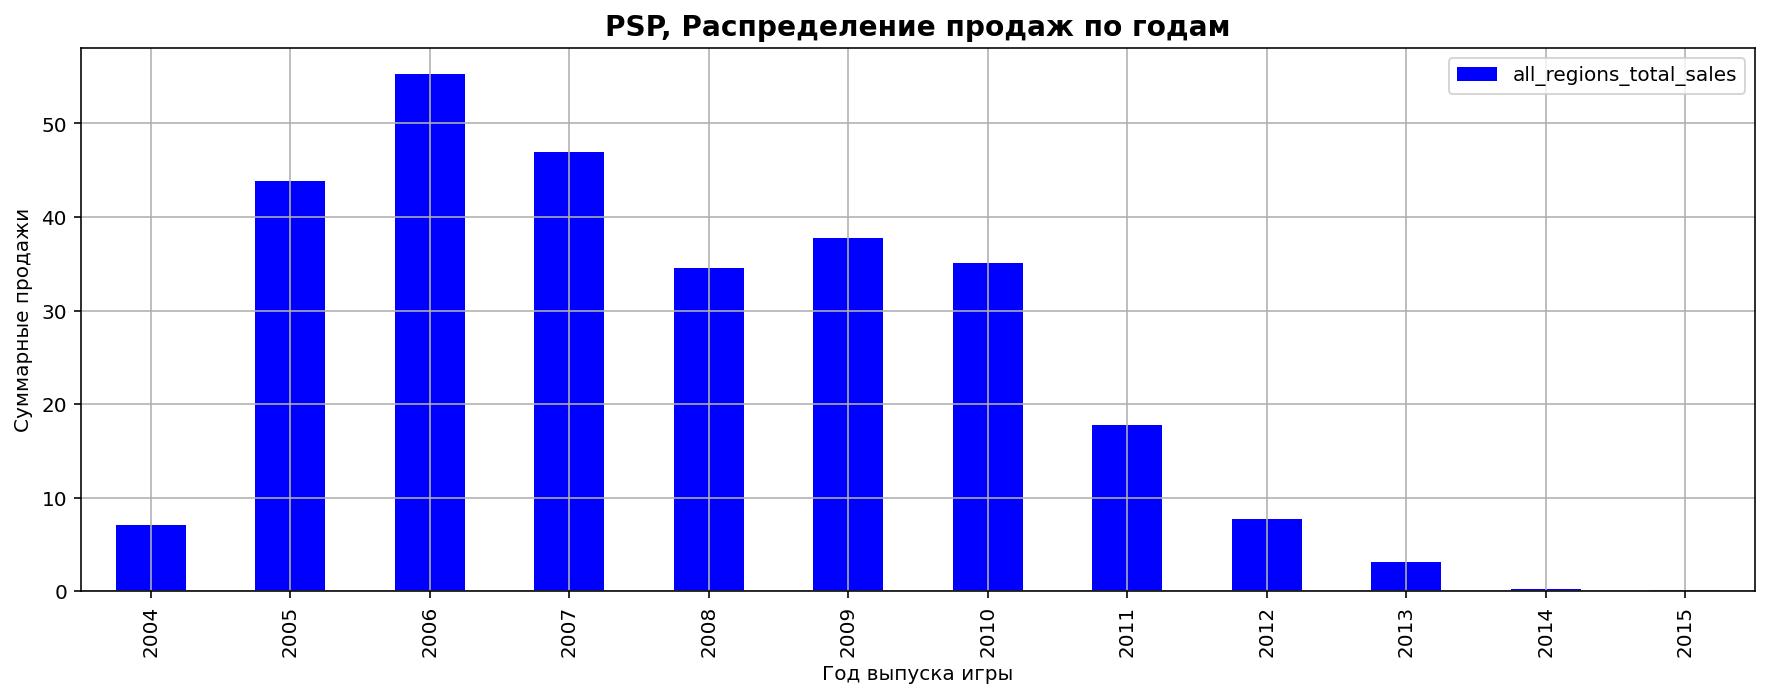

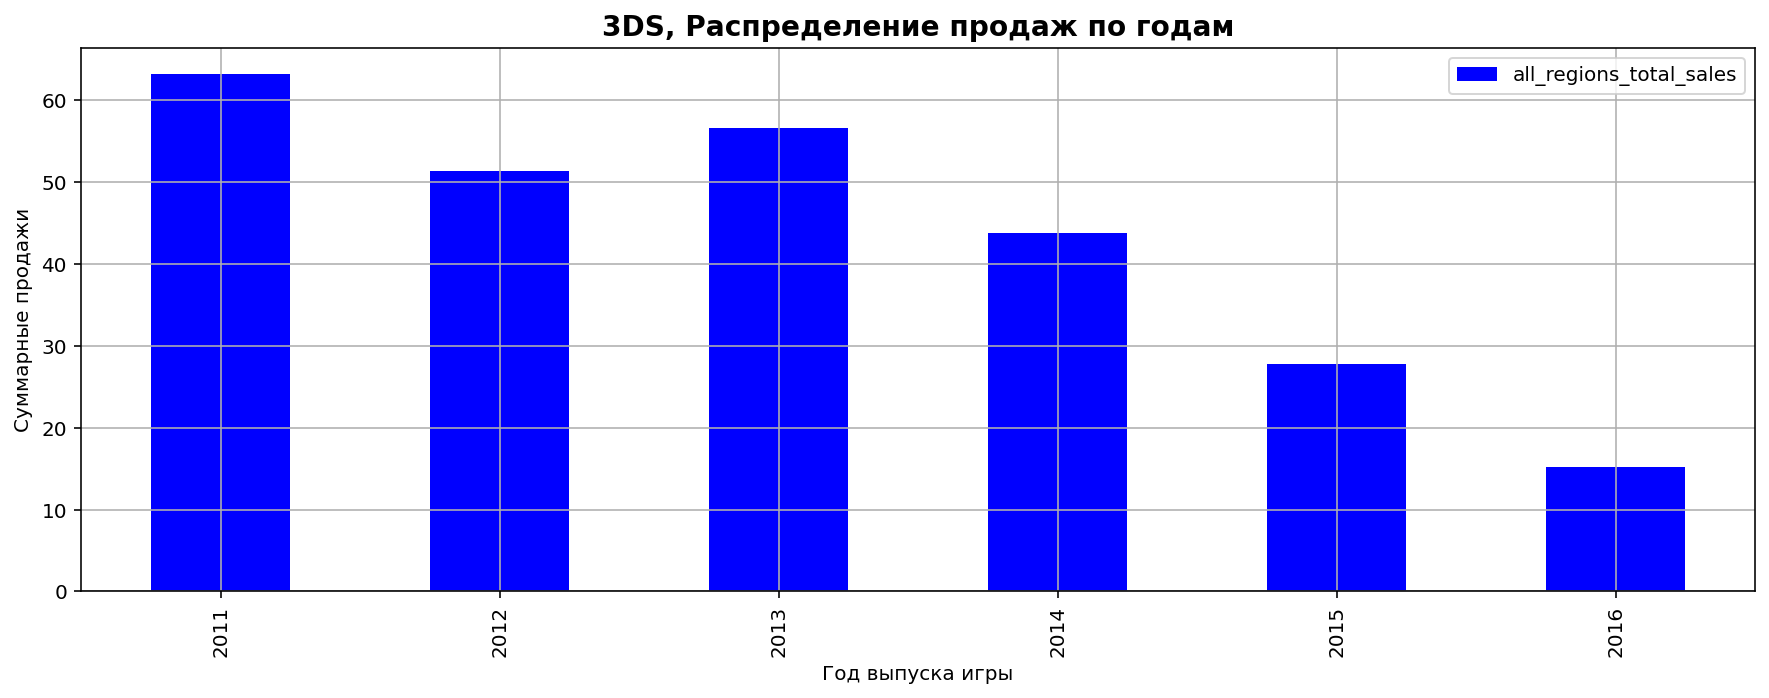

In [ ]:
# построем распределение top_10_platforms по годам

for p in top_10_platforms:
    data[data['platform'] == p].pivot_table(index='year_of_release', values='all_regions_total_sales', aggfunc='sum')\
    .plot(
        y='all_regions_total_sales',
        kind='bar',
        figsize=(15, 5),
        alpha=1,
        grid=True,
        color='blue',
        xlabel='Год выпуска игры',
        ylabel='Суммарные продажи')
    plt.title(label=f'{p}, Распределение продаж по годам', fontsize=14, fontweight='bold')


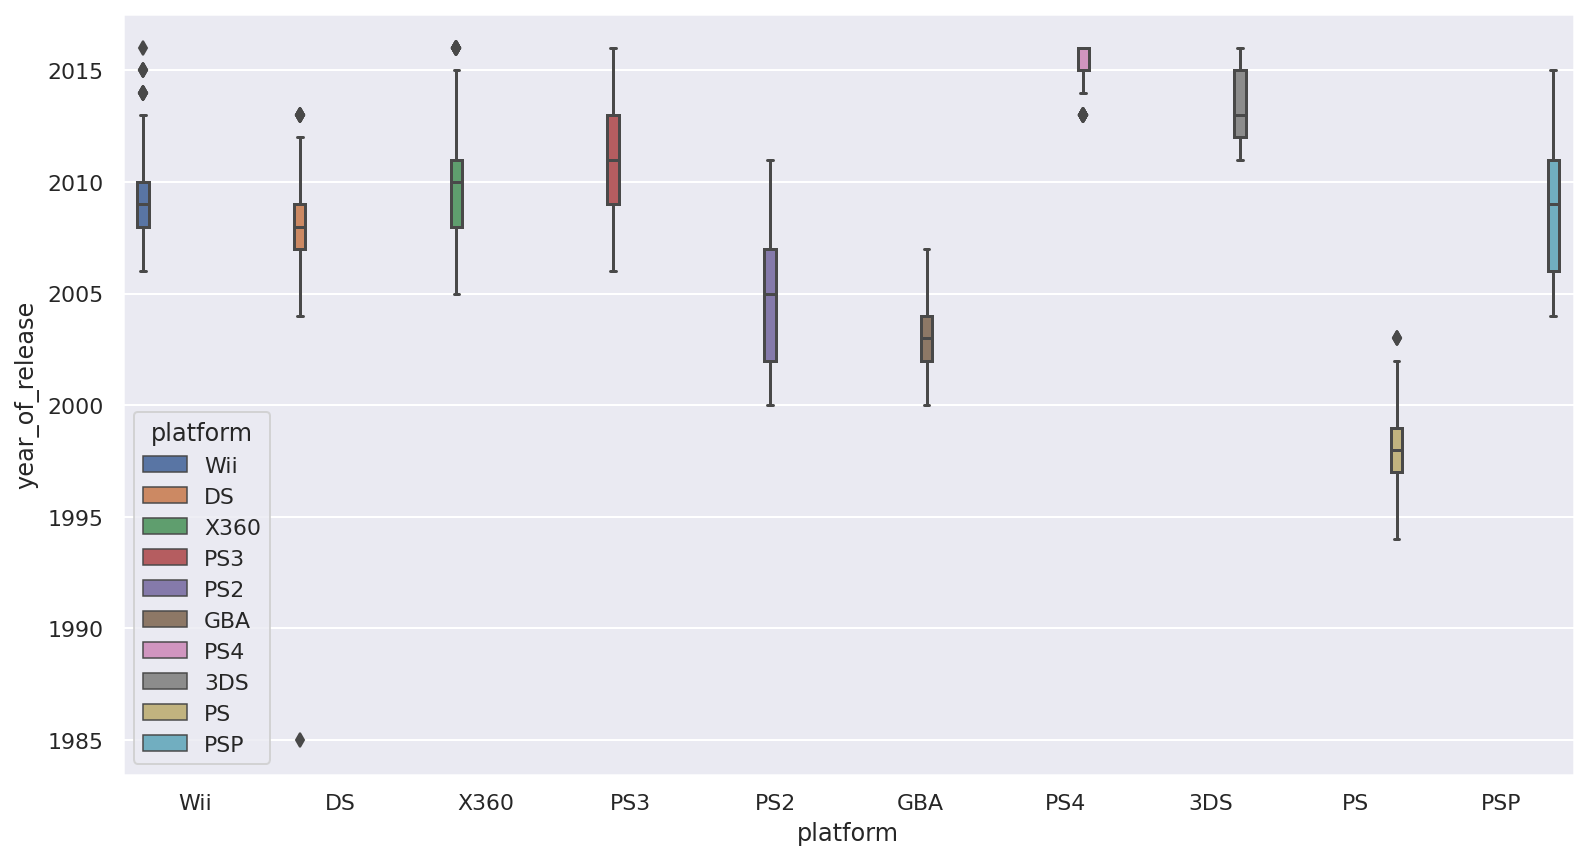

In [ ]:
# визуализируем также на диаграмме рахмаха распределение жизненного цикла платформ

sns.set(rc={'figure.figsize':(13,7)})
sns.boxplot(x='platform', y='year_of_release', hue='platform',
            data=data[data.platform.isin(top_10_platforms)]);

**Вывод:**

Мы проанализировали top-10 игровых платформ с наибольшими суммарными глобальными продажами по годам:

- На графиках распределения видно, что **средний период жизненного цикла платформ 9-11 лет**. Также можно увидеть **резкий рост в течение 2-3 лет, небольшой период стабильности около 2-4 лет, и далее резкое падение**;


- Большинство top-10 платформ, в том числе самая популярная платформа PS2 - около 200 млн. суммарных продаж в 2004 году, к сожалению, не дожили до актуального для нас периода, до 2016 года. **Актуальные платформы из списка - X360, PS3, Wii, PS4, 3DS**;


- Интересно наблюдать появление новых платформ и исчезание старых на примере PS(бренд Sony). **Появление нового продукта происходит каждые 6 лет, самая последняя версия PS4 вышла в 2013 году, значит является наиболее перспективной для нашего исследования**;


- Очевидно, что такие платформы как - **X360, PS3, Wii - находятся в конечной стадии жизненного цикла**. **Платформа 3DS появилась в 2011 году**, однако нельзя сказать, что она является очень перпективной, так как **на графике видно падение продаж с 2014 года**;


- Таким образом, **PS4 - самая интересная и перспективная платформа из списка top-10**. **Платформа появилась в 2013 году и показывает рост продаж в 2014 -2015 годах**.

 - **Возьмем данные за соответствующий актуальный период**

Нашей задачей являтся выявить, какие факторы влияют на успешность игры, чтобы спрогнозировать продажи и спланировать рекламную кампанию на 2017 год, как мы уже писали выше, нам очень важно взять самые актуальные данные, чтобы захватить самые актуальные и современные тренды на рынке компьютерных игр. Поэтому, **возьмем данные за последние 3 года, с 2014 по 2016 год**, так как, например, пять лет уже достаточно большой временной интервал для такой динамично меняющейся индустрии, а три года это золотая середина.

In [ ]:
# сформируем датасет actual_period_data, чтобы не учитывать в исследовании данные за предыдущие годы


actual_period_data = data[(data['year_of_release'] >= 2014)]
actual_period_data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_regions_total_sales
7505,Assassin's Creed The Ezio Collection,PS4,2016,Action,0.04,0.13,0.00,0.03,72.0,7.4,M,0.20
8190,Back to the Future: The Game,PS4,2015,Adventure,0.10,0.05,0.00,0.03,0.0,7.1,T,0.18
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
7558,Story of Seasons: Good Friends of the Three Vi...,3DS,2016,Simulation,0.00,0.00,0.20,0.00,0.0,0.0,unknown,0.20
13391,Puyo Puyo Tetris,PSV,2014,Puzzle,0.00,0.00,0.05,0.00,0.0,0.0,unknown,0.05


In [ ]:
# сформируем перечень актуальных платформ для actual_period_data

actual_platforms = actual_period_data.platform.value_counts().sort_values(ascending = False).index.values
actual_platforms

array(['PS4', 'PSV', 'XOne', 'PS3', '3DS', 'PC', 'X360', 'WiiU', 'PSP',
       'Wii'], dtype=object)

**- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

**- Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**

(0.0, 2.0)

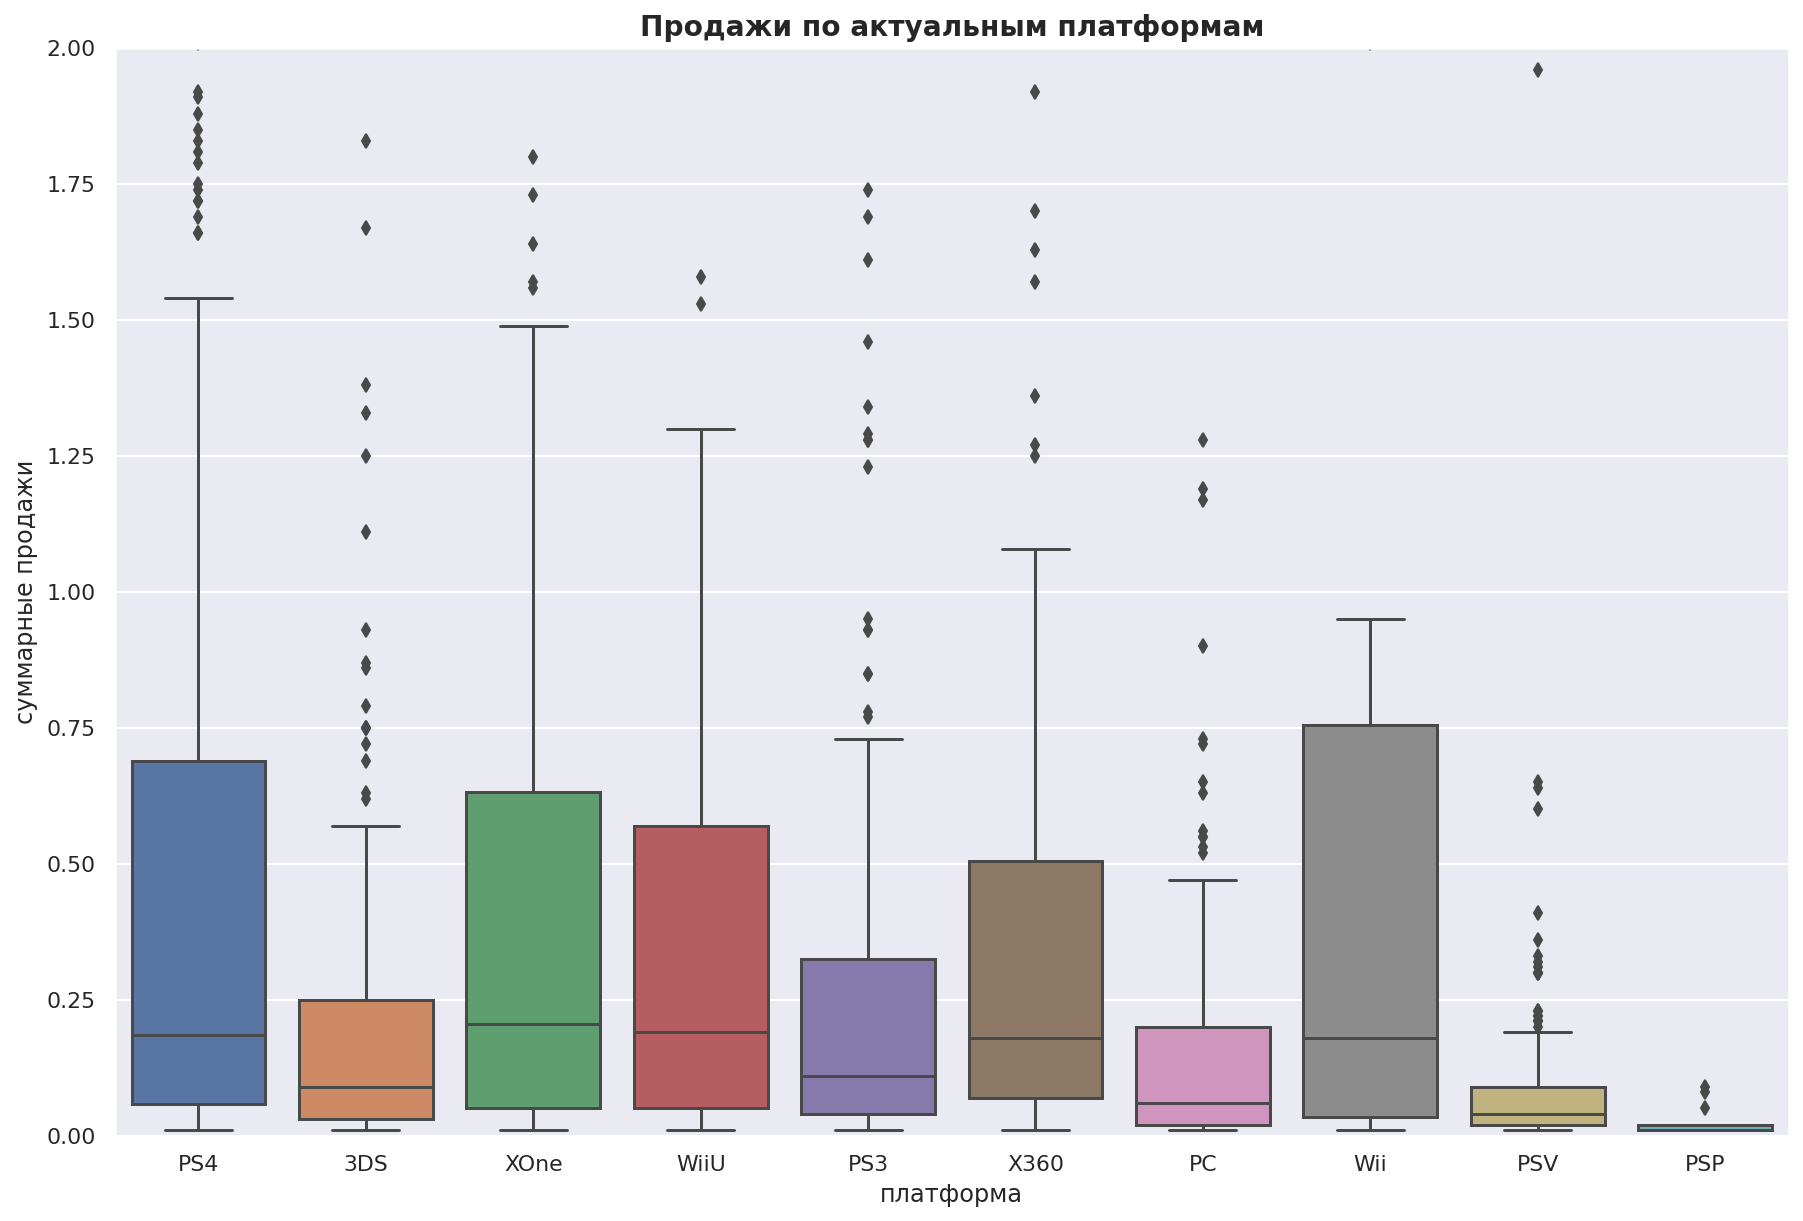

In [ ]:
# визуализируем на графике «ящик с усами»  распределение суммарных глобальных продаж по актуальным платформам

sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x='platform', y='all_regions_total_sales', data=actual_period_data,);
plt.title('Продажи по актуальным платформам', fontsize=14, fontweight='bold')
plt.xlabel('платформа')
plt.ylabel('суммарные продажи')
plt.ylim(0, 2)

**Вывод:**

На графике видно, что у некоторых платформ размах "усов", медиана, и Q1/Q3 квартили - почти идентичны. Так например, у платформ PS4 и XOne, похожая ситуация у платформ WiiU и X36, и у 3DS и PC. Можно предположить, что это означает, что у данных пар платформ похожее положение на глобальном рынке, т.е такие платформы прямые конкуренты друг-другу.

Лидируют по глобальным продажам платформы PS4 и XOne, совсем упали продажи у платформы PSP.

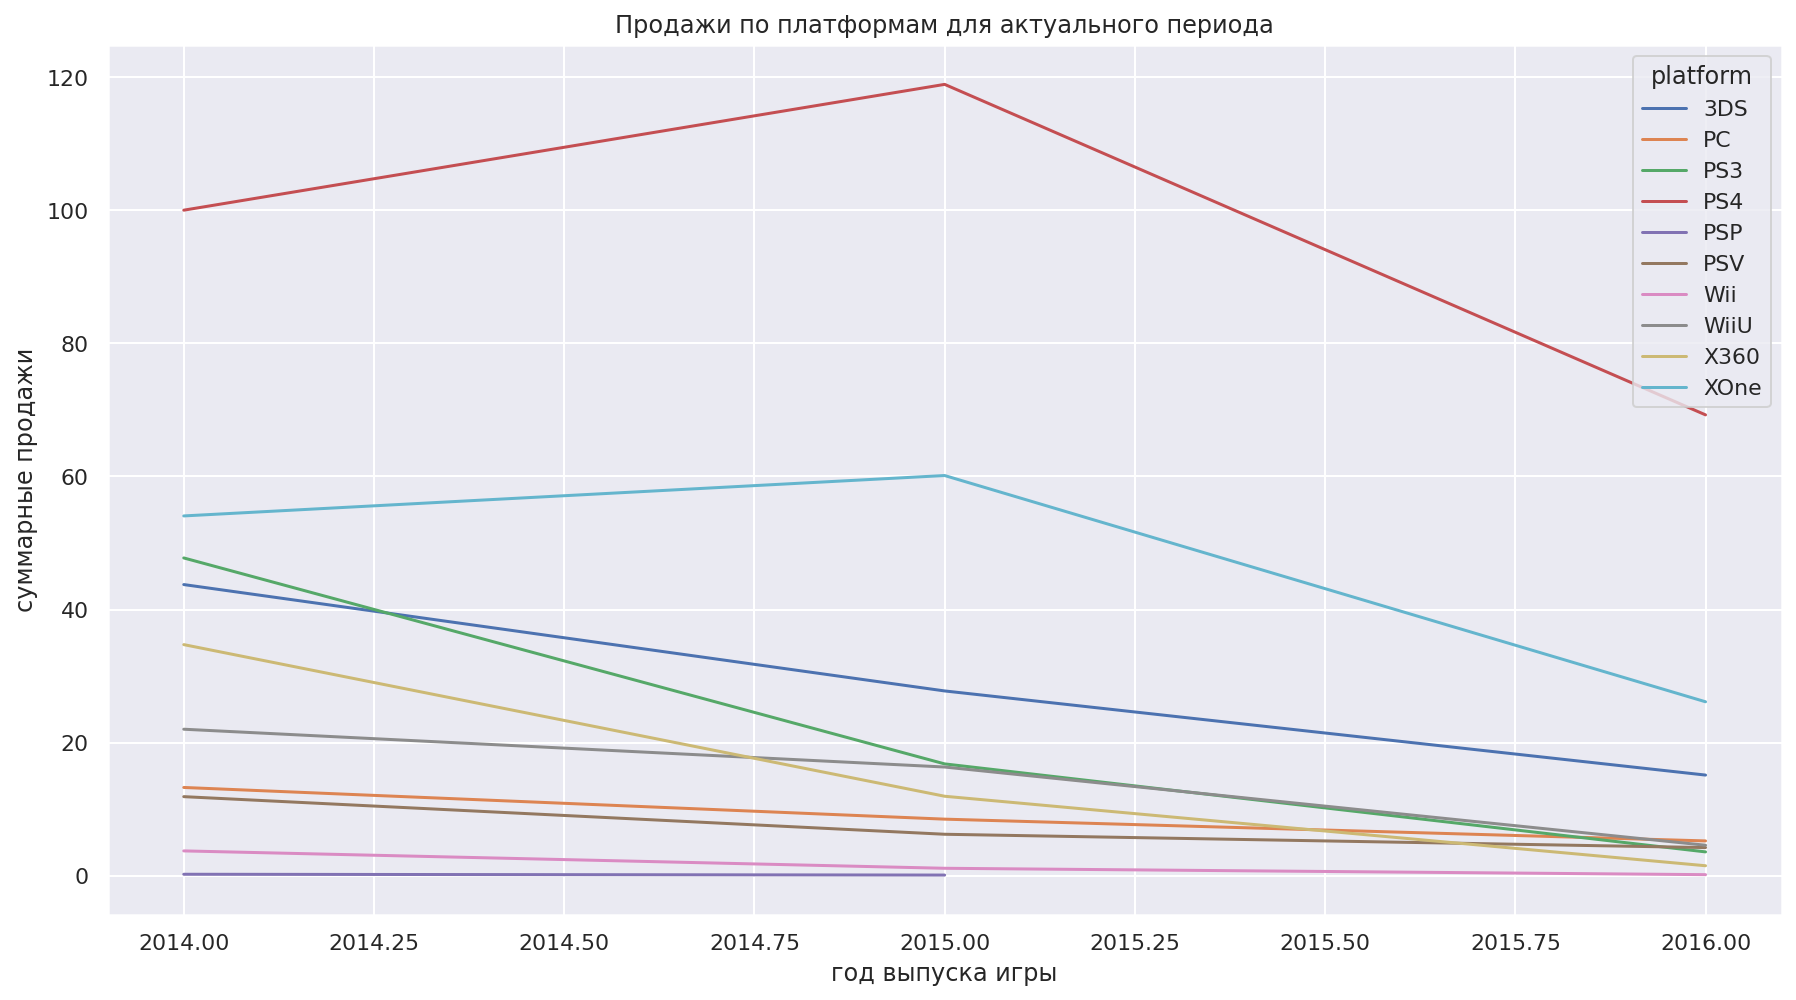

In [ ]:
# визуализируем на графике какие платформы лидируют по продажам, растут или падают в актульном периоде

actual_period_data.pivot_table(
    index='year_of_release',
    columns='platform',
    values='all_regions_total_sales',
    aggfunc='sum').plot(figsize=(15,8), title='Продажи по платформам для актуального периода')
plt.ylabel('суммарные продажи')
plt.xlabel('год выпуска игры')
plt.show()

**Вывод:**

На графике видно, что платформы - PS4 и XOne - показывали рост продаж в 2014 - 2015, однако, в 2016 году обе платформы упали. Остальные платформы, очевидно, имеют более долгий жизненный цикл и  показывают падение с 2014 года.

По распределению на графиках выше мы видим, что **две платформы - PS4 и XOne - лидируют по продажам**. Таким образом, **PS4 и XOne являются наиболее перспективными и потенциально прибыльными** для планирования кампании на 2017 год.  

**- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**.
 **Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами**.
 **Сформулируем выводы**.

**Проведем анализ наиболее перспективной платформы PS4.**

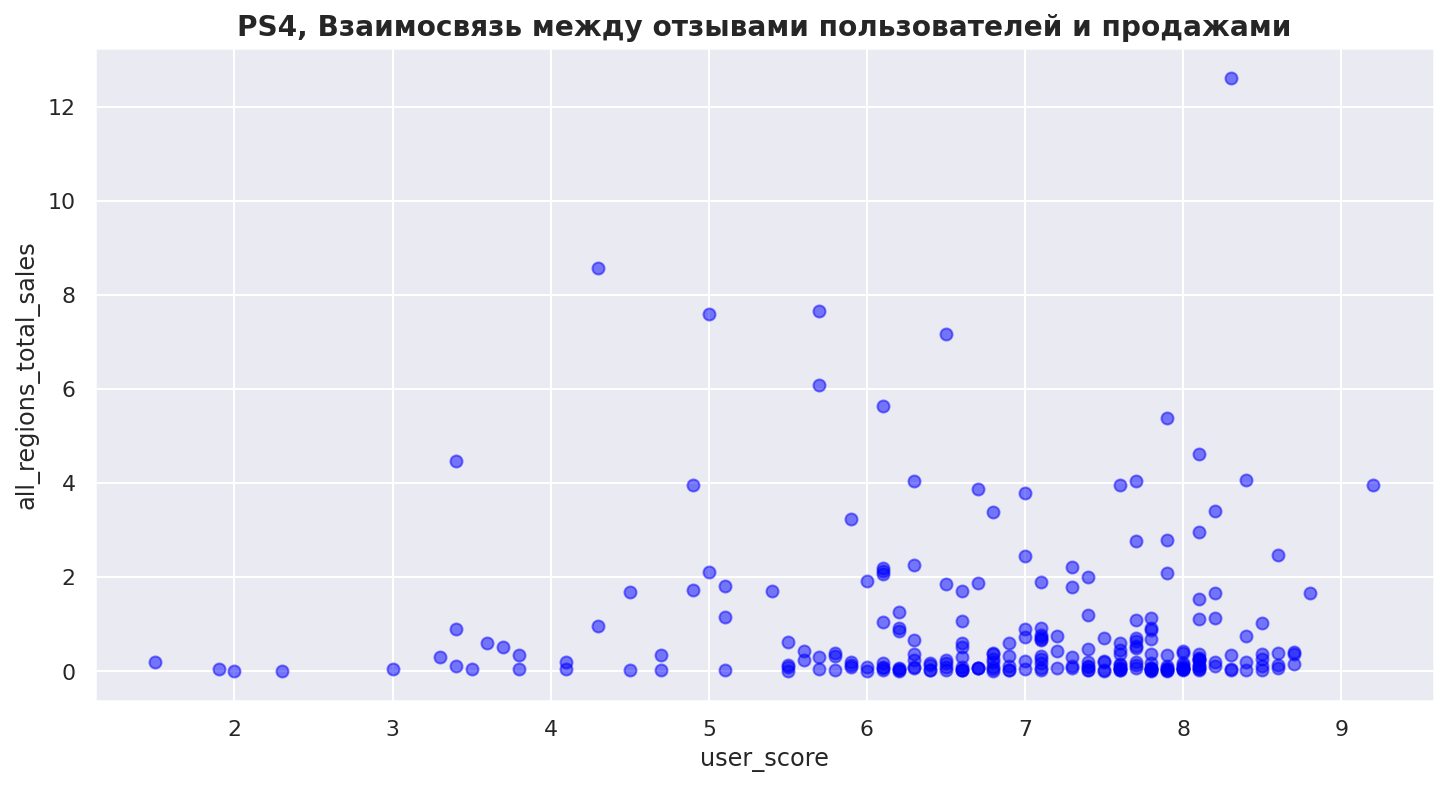

Коэффициент корреляции Пирсона между отзывами пользователей и продажами внутри платформы PS4: -0.04


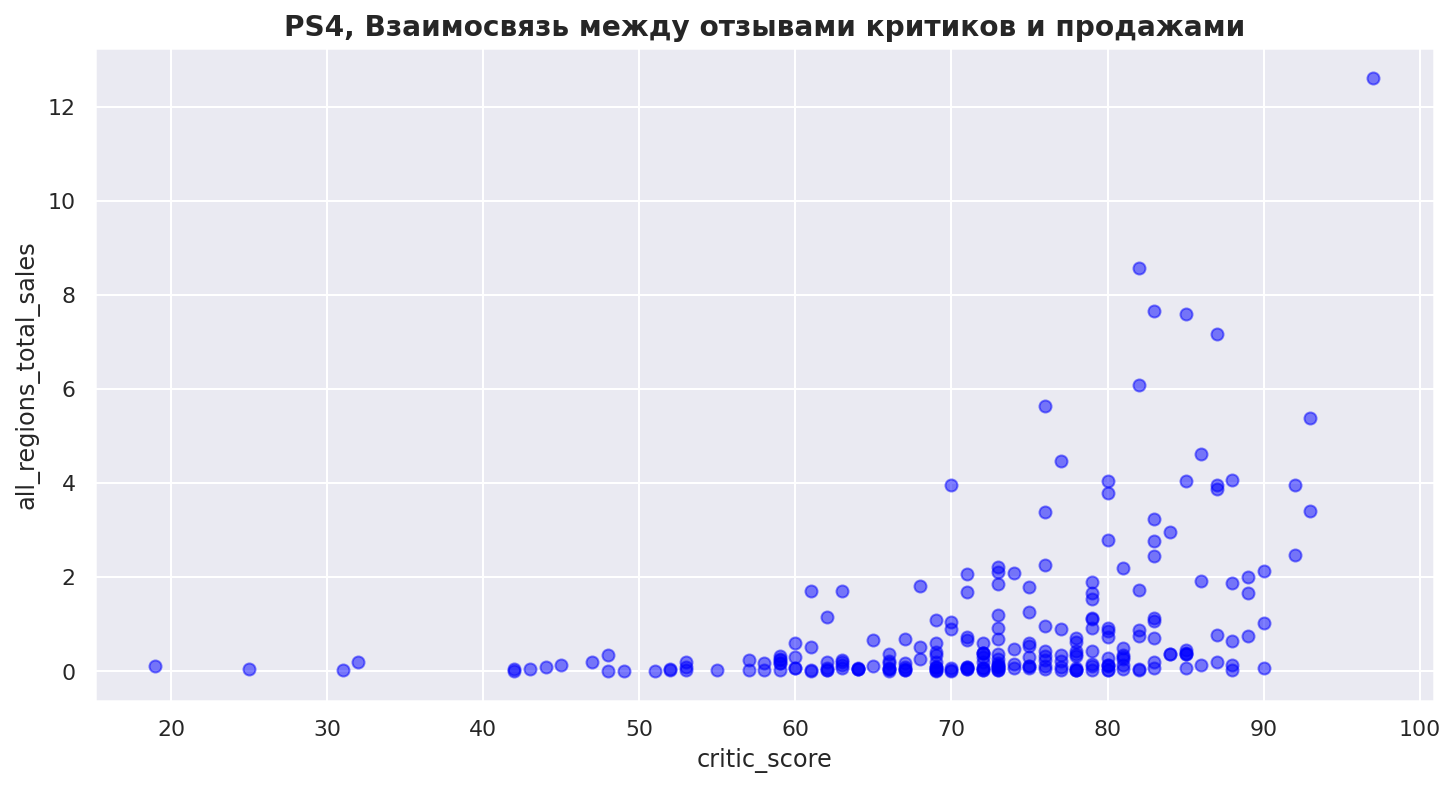

Коэффициент корреляции Пирсона между отзывами критиков и продажами внутри платформы PS4: 0.403


In [ ]:
# построим диаграмму рассеяния, чтобы посмотреть на взаимосвязь между отзывами пользователей и продажами внутри платформы PS4
# в срезе данных отфильтруем пропуски - нулевые значения в столбце user_score

x = actual_period_data.query('user_score != 0 and platform == "PS4"')['user_score']
y = actual_period_data.query('user_score != 0 and platform == "PS4"')['all_regions_total_sales']

fig, ax = plt.subplots()

ax.scatter(x, y, c = 'blue', alpha=0.5);
ax.set_title('PS4, Взаимосвязь между отзывами пользователей и продажами', fontsize=14, fontweight='bold')
ax.grid(True)
fig.set_figwidth(12)
fig.set_figheight(6)
ax.set_xlabel('user_score')
ax.set_ylabel('all_regions_total_sales')
plt.show()

# посчитаем корреляцию между отзывами пользователей и продажами внутри платформы PS4
# в срезе данных отфильтруем пропуски - нулевые значения в столбце user_score

print('Коэффициент корреляции Пирсона между отзывами пользователей и продажами внутри платформы PS4:',\
      round(actual_period_data[(actual_period_data['user_score'] != 0)&(actual_period_data['platform'] == 'PS4')]['user_score']\
            .corr(actual_period_data[(actual_period_data['user_score'] != 0)&(actual_period_data['platform'] == 'PS4')]['all_regions_total_sales']), 3))


# построим диаграмму рассеяния, чтобы посмотреть на взаимосвязь между отзывами критиков и продажами внутри платформы PS4
# в срезе данных отфильтруем пропуски - нулевые значения в столбце critic_score

x = actual_period_data.query('critic_score != 0 and platform == "PS4"')['critic_score']
y = actual_period_data.query('critic_score != 0 and platform == "PS4"')['all_regions_total_sales']

fig, ax = plt.subplots()

ax.scatter(x, y, c = 'blue', alpha=0.5);
ax.set_title('PS4, Взаимосвязь между отзывами критиков и продажами', fontsize=14, fontweight='bold')
ax.grid(True)
fig.set_figwidth(12)
fig.set_figheight(6)
ax.set_xlabel('critic_score')
ax.set_ylabel('all_regions_total_sales')
plt.show()

# посчитаем корреляцию между отзывами критиков и продажами внутри платформы PS4
# в срезе данных отфильтруем пропуски - нулевые значения в столбце critic_score

print('Коэффициент корреляции Пирсона между отзывами критиков и продажами внутри платформы PS4:',\
      round(actual_period_data[(actual_period_data['critic_score'] != 0)&(actual_period_data['platform'] == 'PS4')]['critic_score']\
            .corr(actual_period_data[(actual_period_data['critic_score'] != 0)&(actual_period_data['platform'] == 'PS4')]['all_regions_total_sales']), 3))

**Вывод:**

Мы обнаружили отрицательную зависимость продаж от отзывов пользователей, коэффицент корреляции равен -0.04. А также, слабую зависимость продаж от отзывов критиков, коэффицент корреляции равен 0.403, т.е линейная связь существует, но слабая.

Таким образом, можно сделать вывод, что **сильной взаимосвязи продаж внутри платформы PS4 от отзывов не выявлено**.

**- Соотнесем выводы с продажами игр на других платформах;**

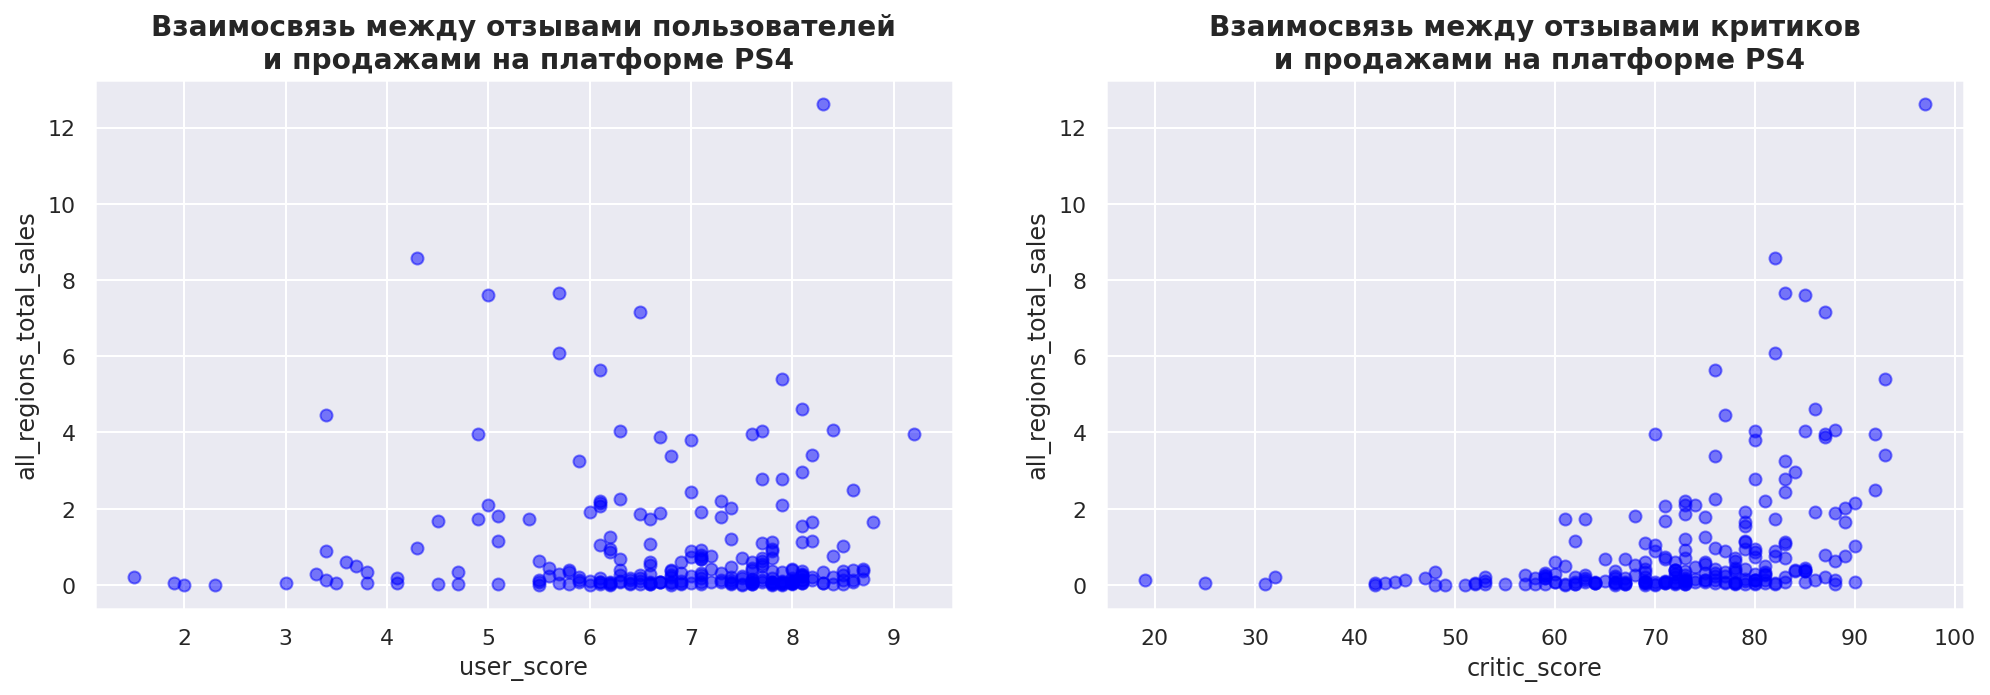

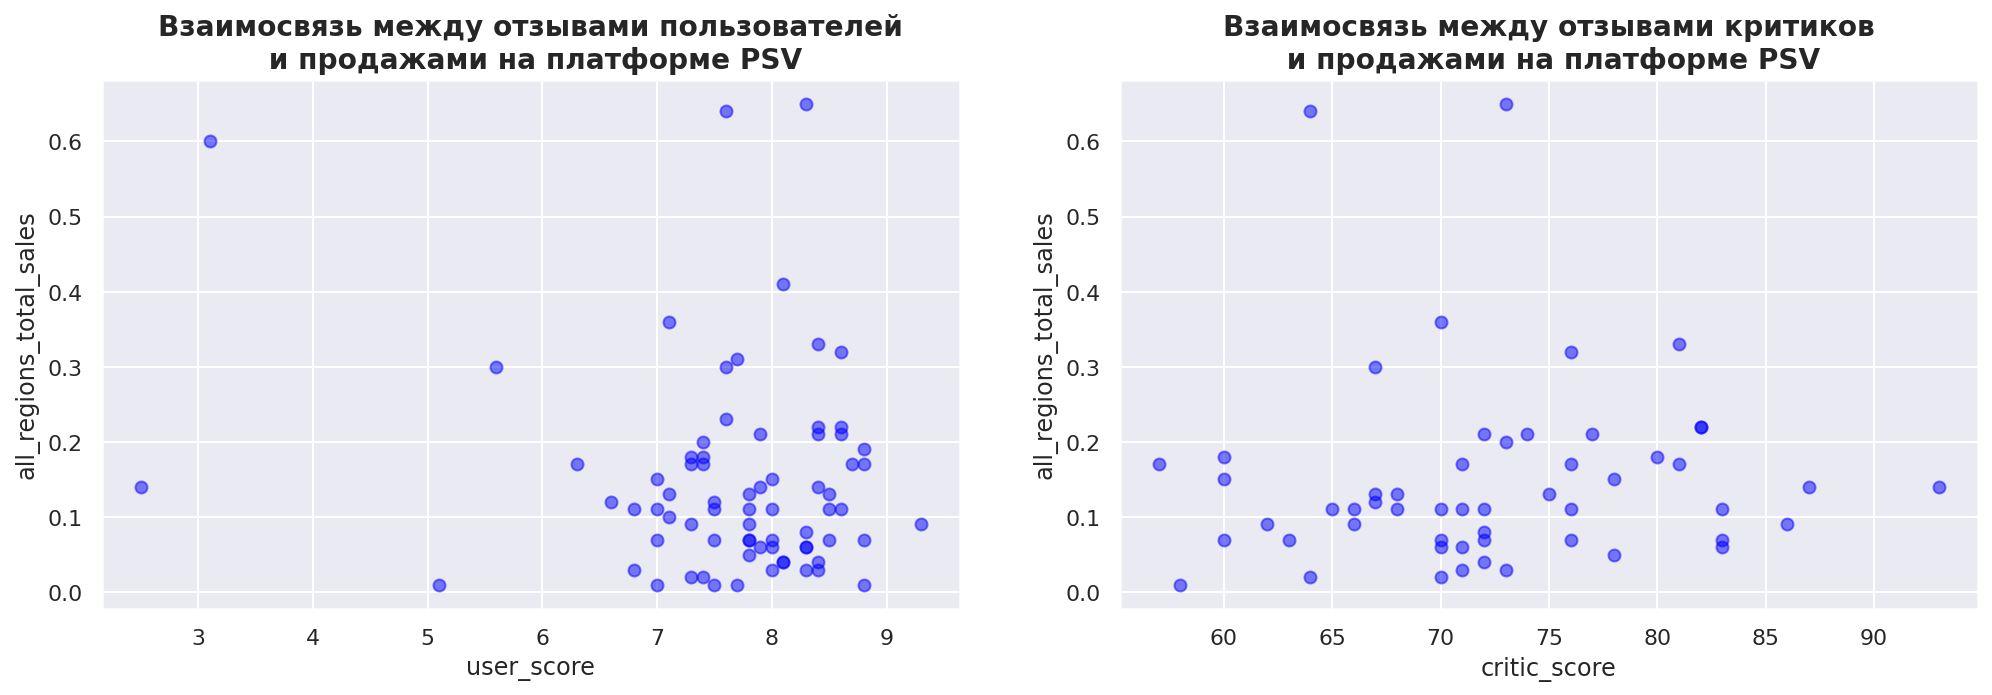

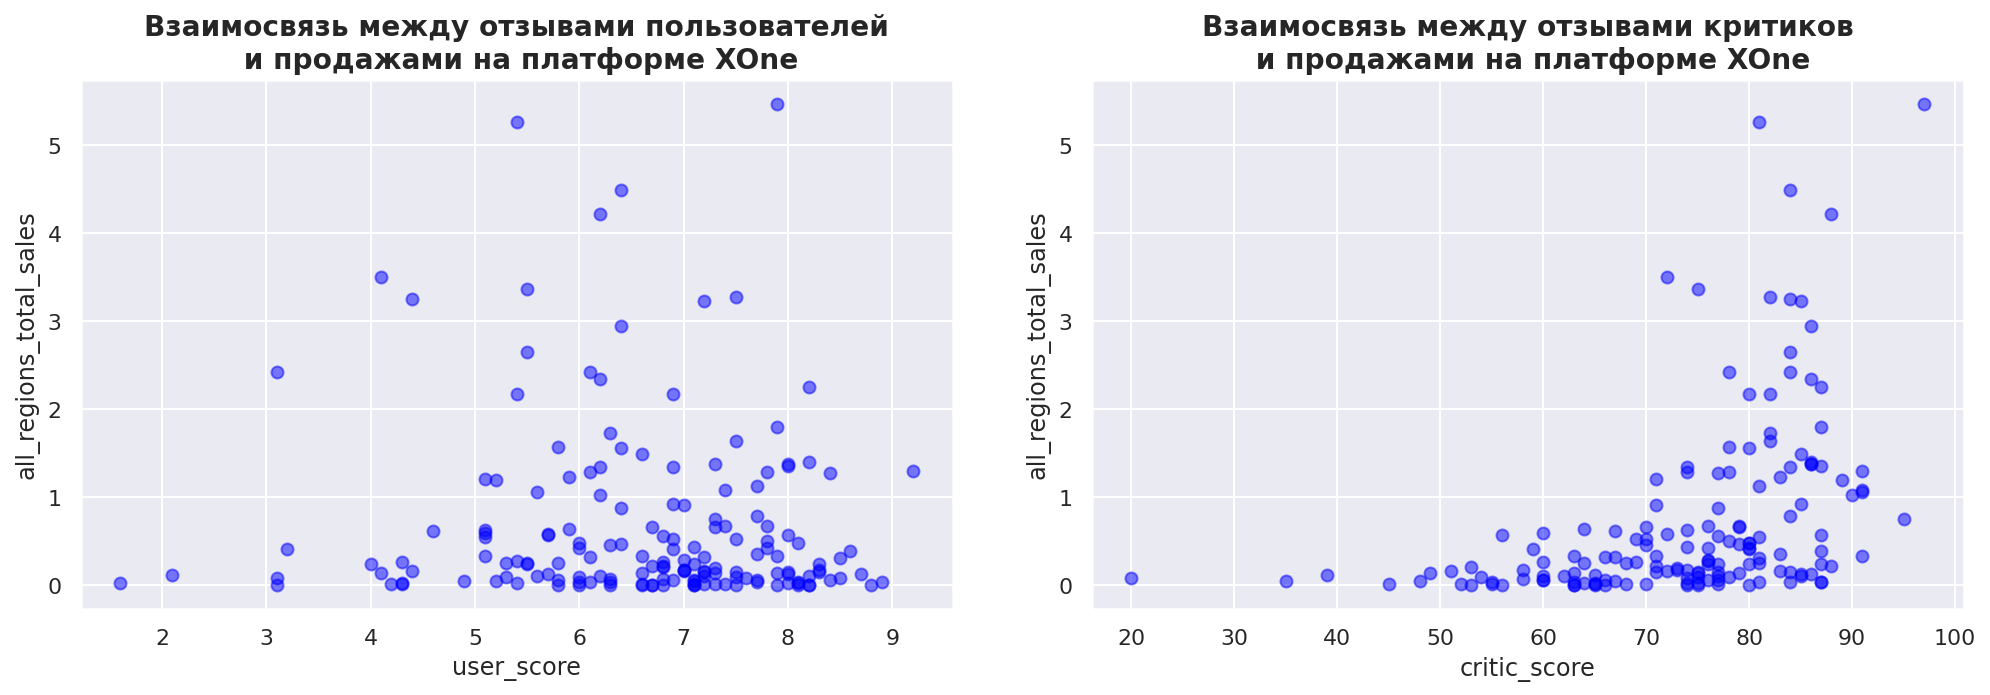

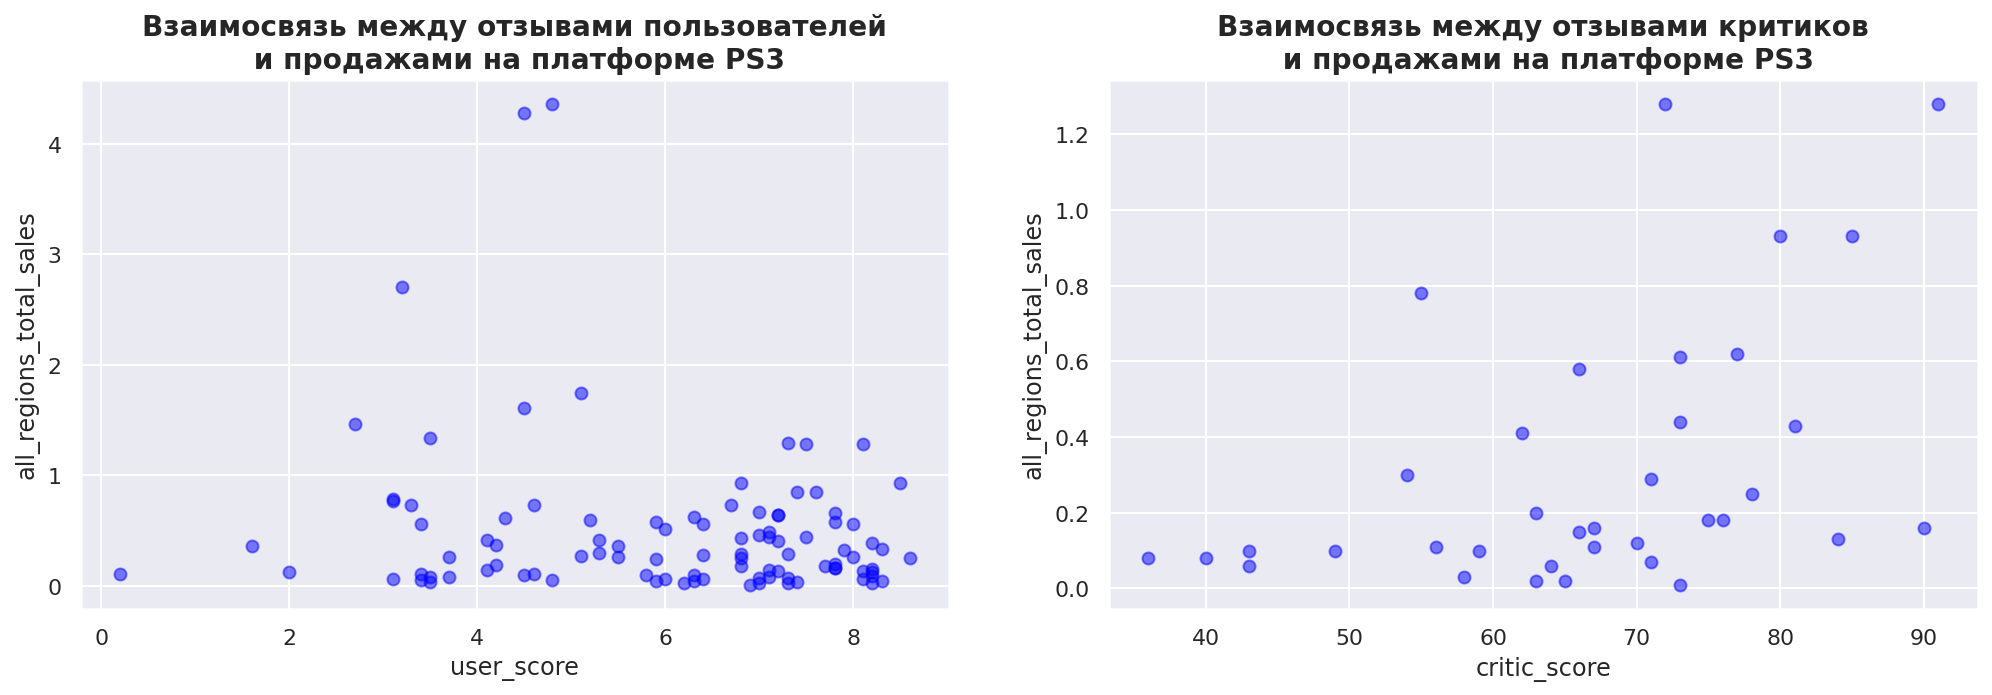

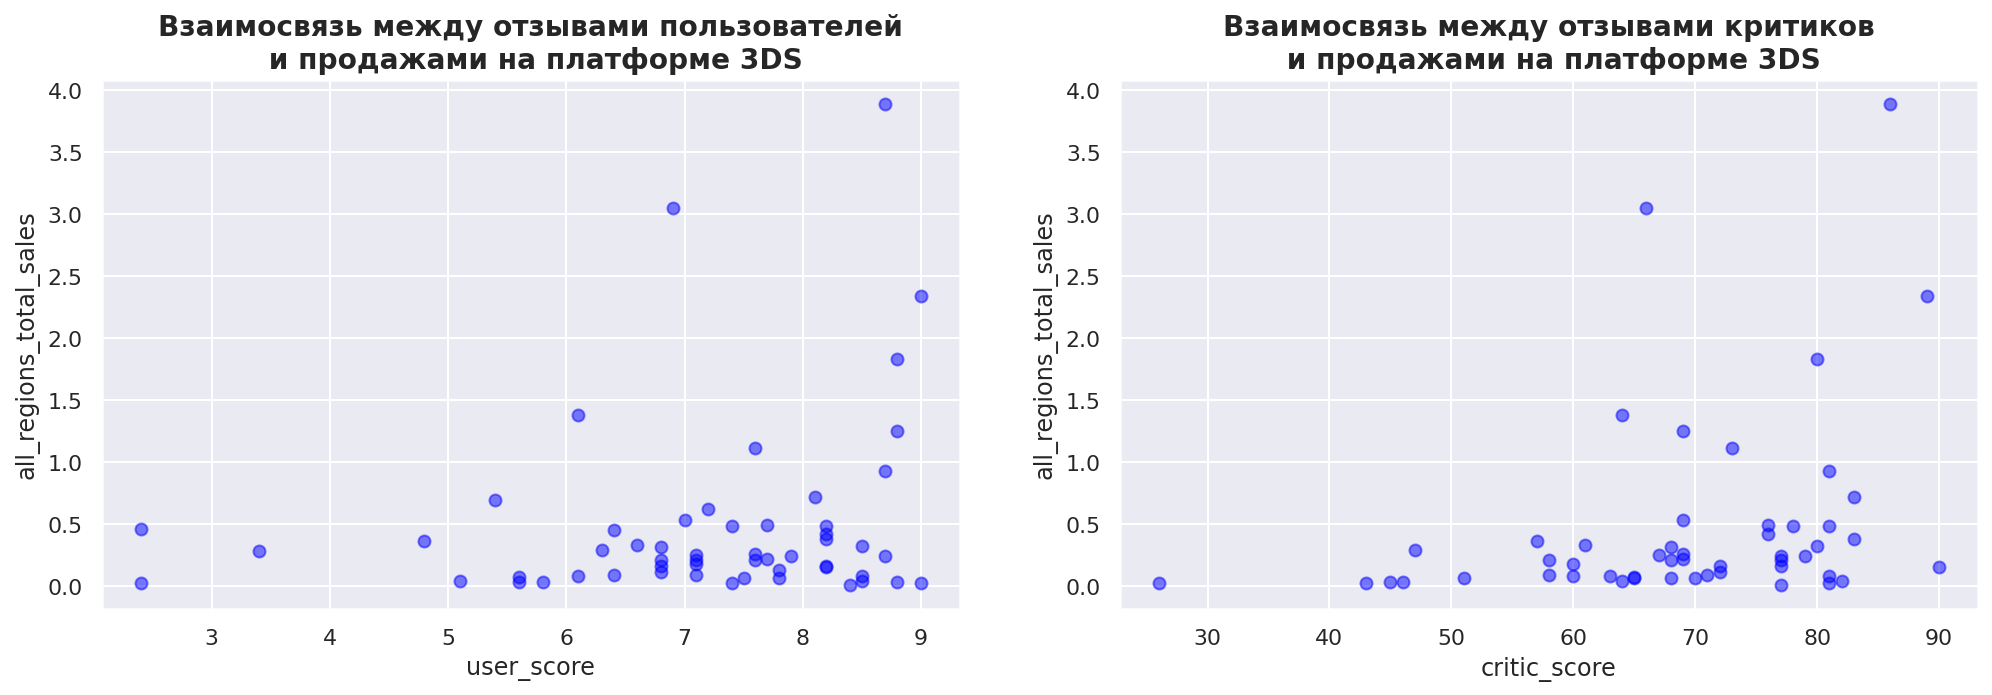

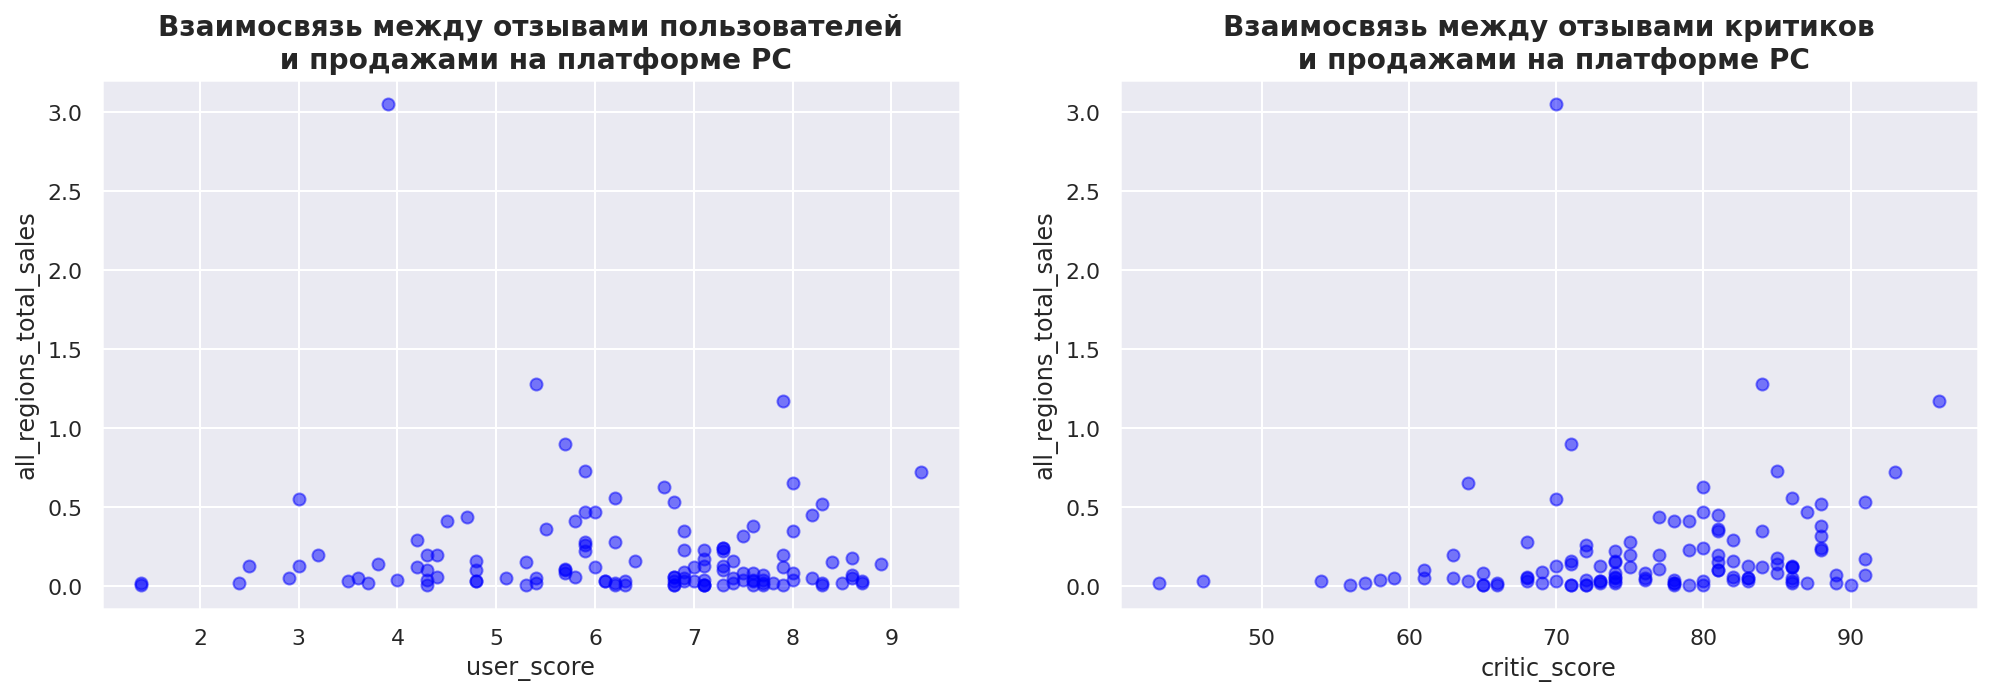

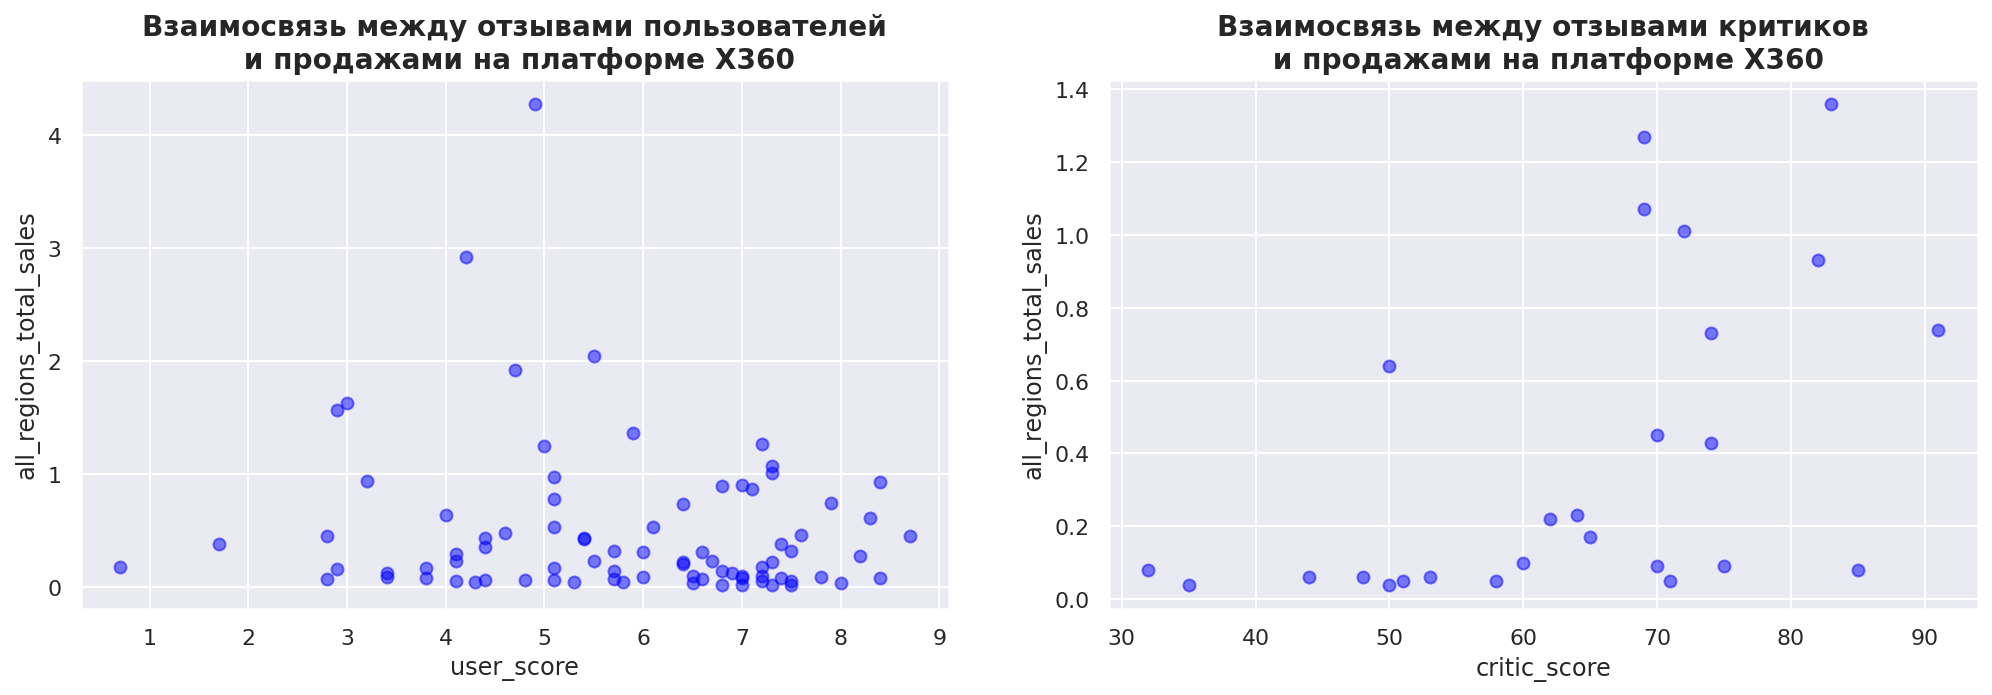

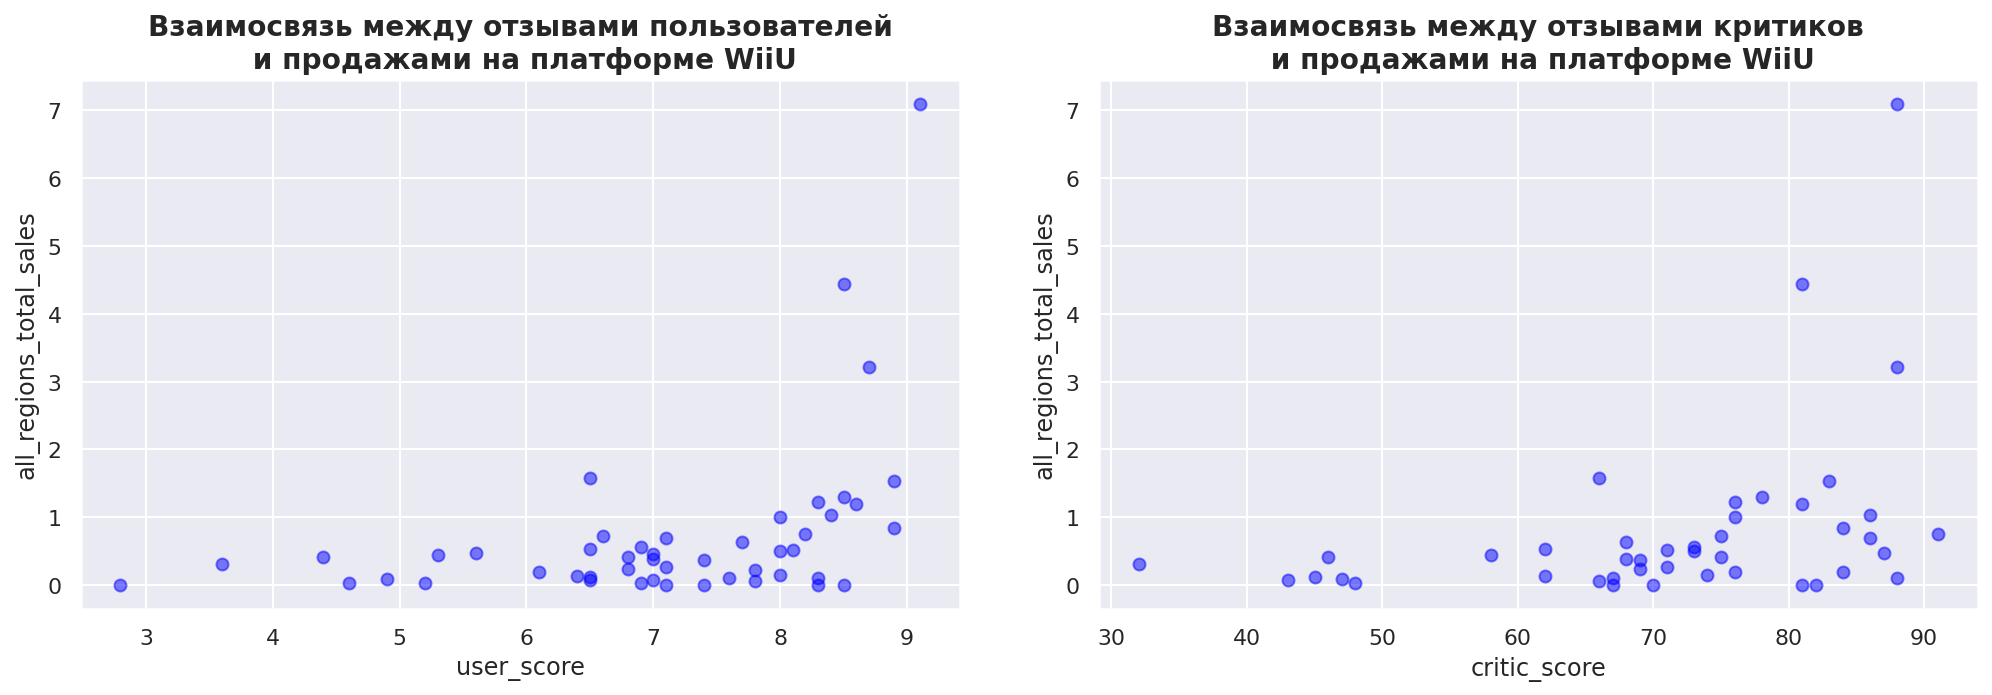

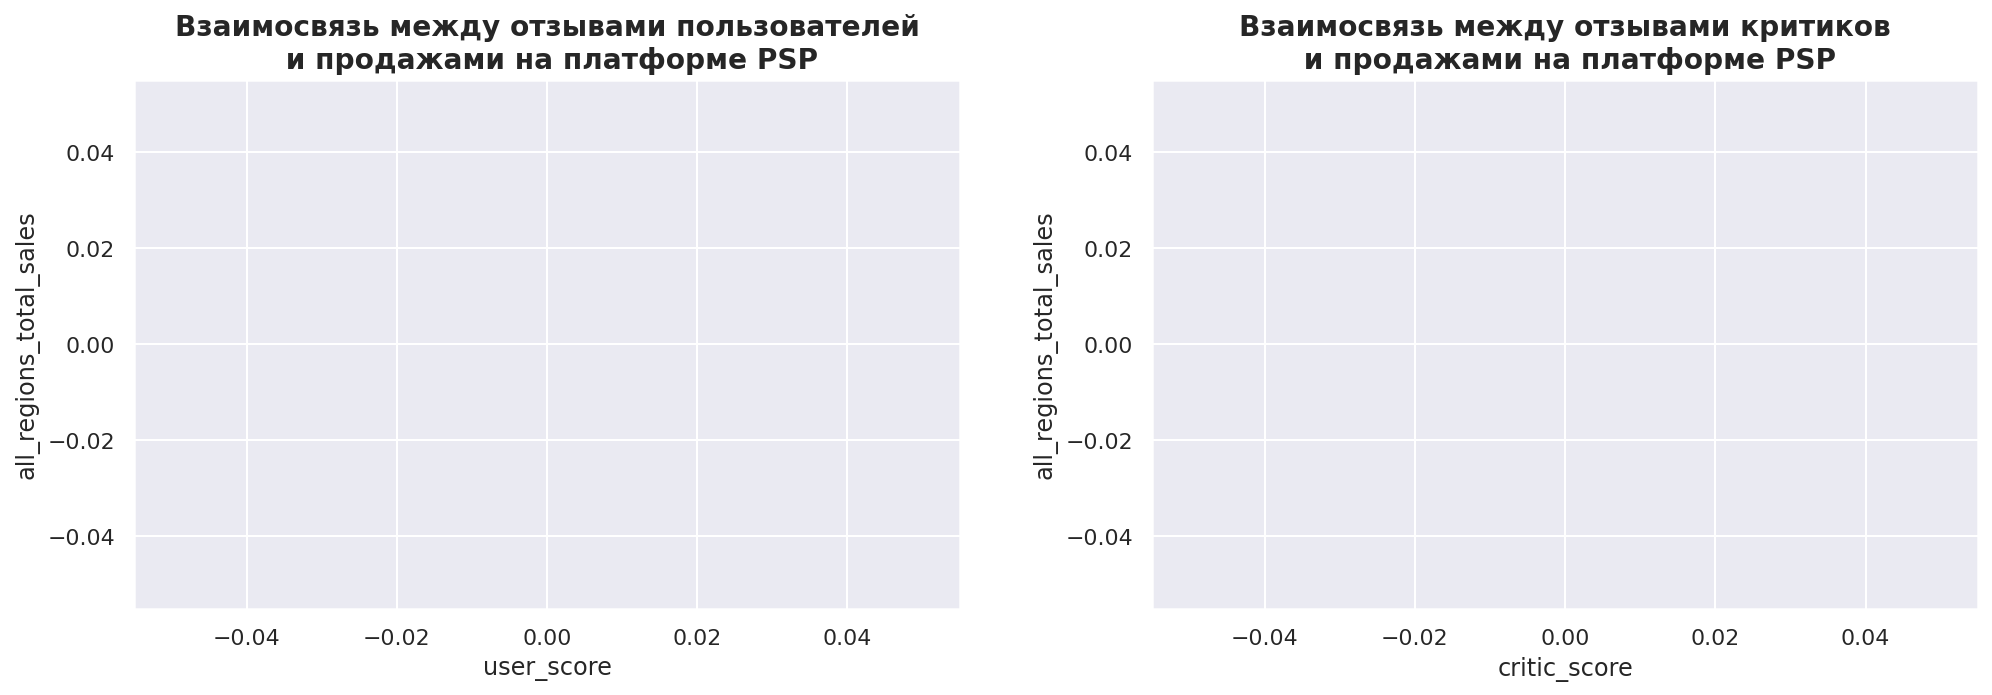

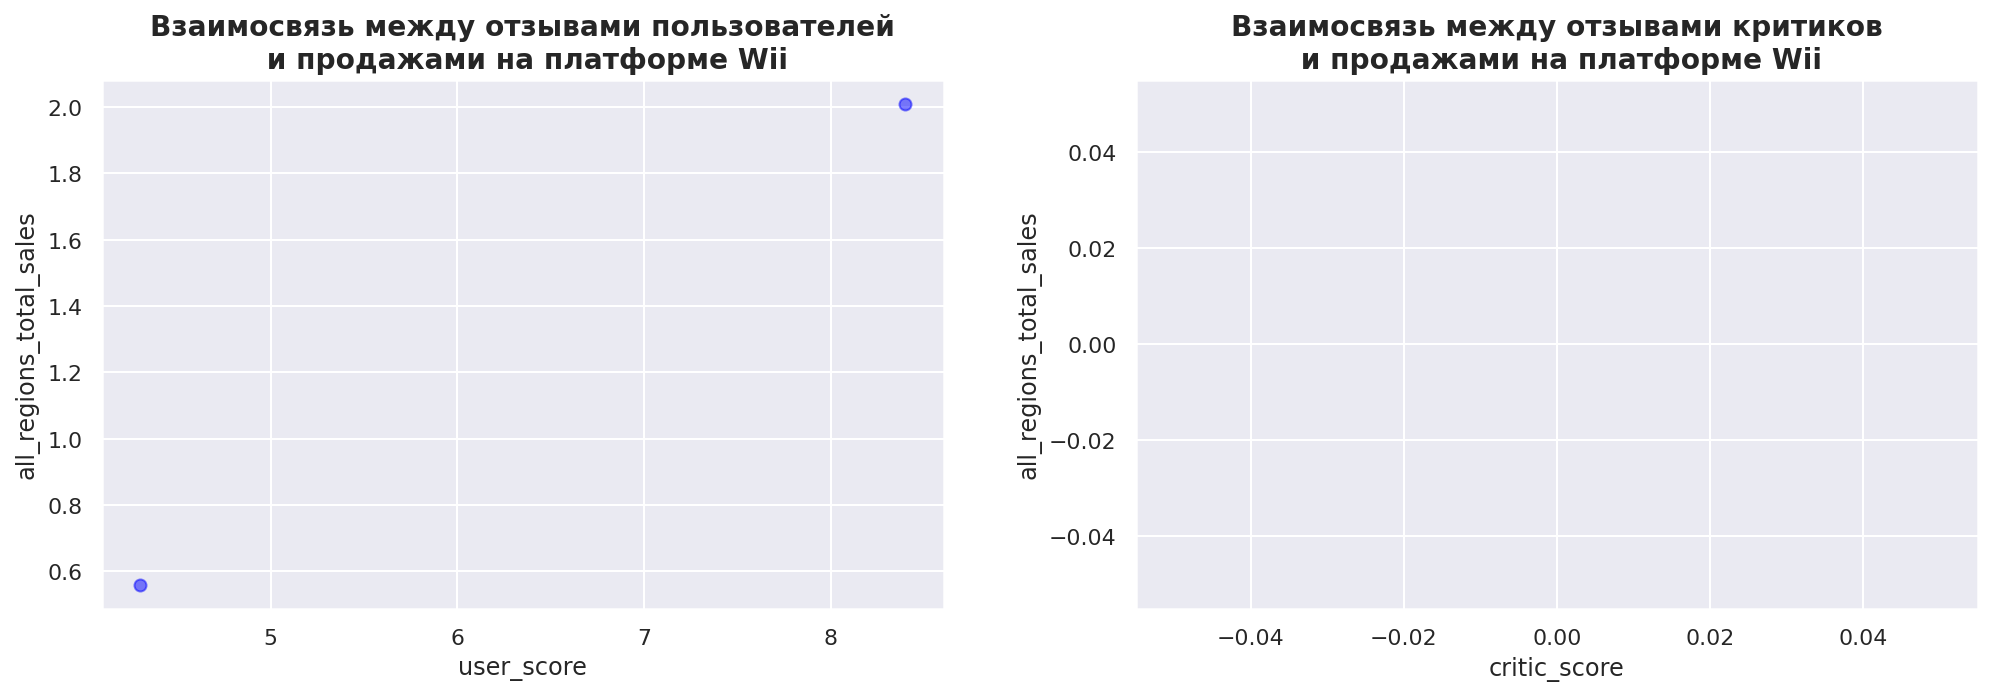

PS4 :
Коэффициент корреляции Пирсона между отзывами пользователей и продажами: -0.04
Коэффициент корреляции Пирсона между отзывами критиков и продажами: 0.403

PSV :
Коэффициент корреляции Пирсона между отзывами пользователей и продажами: -0.168
Коэффициент корреляции Пирсона между отзывами критиков и продажами: 0.043

XOne :
Коэффициент корреляции Пирсона между отзывами пользователей и продажами: -0.07
Коэффициент корреляции Пирсона между отзывами критиков и продажами: 0.429

PS3 :
Коэффициент корреляции Пирсона между отзывами пользователей и продажами: -0.167
Коэффициент корреляции Пирсона между отзывами критиков и продажами: 0.447

3DS :
Коэффициент корреляции Пирсона между отзывами пользователей и продажами: 0.215
Коэффициент корреляции Пирсона между отзывами критиков и продажами: 0.314

PC :
Коэффициент корреляции Пирсона между отзывами пользователей и продажами: -0.072
Коэффициент корреляции Пирсона между отзывами критиков и продажами: 0.175

X360 :
Коэффициент корреляции Пирсона

In [ ]:
# используем цикл для построения диаграмм рассеяния для каждой платформы из списка actual_platforms

for p in actual_platforms:

    x_user = actual_period_data[(actual_period_data['user_score'] != 0)&(actual_period_data['platform'] == p)]['user_score']
    y_user = actual_period_data[(actual_period_data['user_score'] != 0)&(actual_period_data['platform'] == p)]['all_regions_total_sales']

    x_critic = actual_period_data[(actual_period_data['critic_score'] != 0)&(actual_period_data['platform'] == p)]['critic_score']
    y_critic = actual_period_data[(actual_period_data['critic_score'] != 0)&(actual_period_data['platform'] == p)]['all_regions_total_sales']

    fig = plt.figure()

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.scatter(x_user, y_user, c = 'blue', alpha=0.5);
    ax1.set_title('Взаимосвязь между отзывами пользователей\n и продажами на платформе '+ p, fontsize=14, fontweight='bold')
    ax1.set_xlabel('user_score')
    ax1.set_ylabel('all_regions_total_sales')
    ax.grid(True)
    fig.set_figwidth(12)
    fig.set_figheight(6)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.scatter(x_critic, y_critic, c = 'blue', alpha=0.5);
    ax2.set_title('Взаимосвязь между отзывами критиков\n и продажами на платформе '+ p, fontsize=14, fontweight='bold')
    ax2.set_xlabel('critic_score')
    ax2.set_ylabel('all_regions_total_sales')
    ax.grid(True)
    fig.set_figwidth(14)
    fig.set_figheight(5)

    plt.tight_layout(w_pad=3)
    plt.show()


# посчитаем корреляцию между отзывами пользователей/критиков и продажами внутри каждой actual_platforms
# в срезе данных отфильтруем пропуски - нулевые значения в столбце user_score/critic_score

for p in actual_platforms:
    print(p, ':')
    print('Коэффициент корреляции Пирсона между отзывами пользователей и продажами:',\
      round(actual_period_data[(actual_period_data['user_score'] != 0)&(actual_period_data['platform'] == p)]['user_score']\
            .corr(actual_period_data[(actual_period_data['user_score'] != 0)&(actual_period_data['platform'] == p)]['all_regions_total_sales']), 3))
    print('Коэффициент корреляции Пирсона между отзывами критиков и продажами:',\
      round(actual_period_data[(actual_period_data['critic_score'] != 0)&(actual_period_data['platform'] == p)]['critic_score']\
            .corr(actual_period_data[(actual_period_data['critic_score'] != 0)&(actual_period_data['platform'] == p)]['all_regions_total_sales']), 3))
    print()

**Вывод:**

**При анализе других платформ из актуального списка, вывод об отсутствии сильной взаимосвязи продаж от каких-либо отзывов подтверждается**.

Так, мы можем также проследить отрицательную или слабую зависимость продаж от отзывов пользователей почти у всех платформ, кроме платформы Wii - коэффицент корреляции равен 1.0 - показывает сильную линейную зависимость продаж от отзывов пользователей, это похоже на выбивающееся исключение.

Также, мы прослеживаем слабую зависимость продаж от отзывов критиков, хотя и взаимосвязь между отзывами критиков и продажами более тесная. Наибольшее значение показателя корреляции у платформы X360 - 0.526.
Отметим, что у платформы PSP отсутствуют значения каких-либо отзывов, у платформы Wii отсутствуют значения отзывов критиков, это видно на диаграмме.

**- Посмотрим на общее распределение игр по жанрам.
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

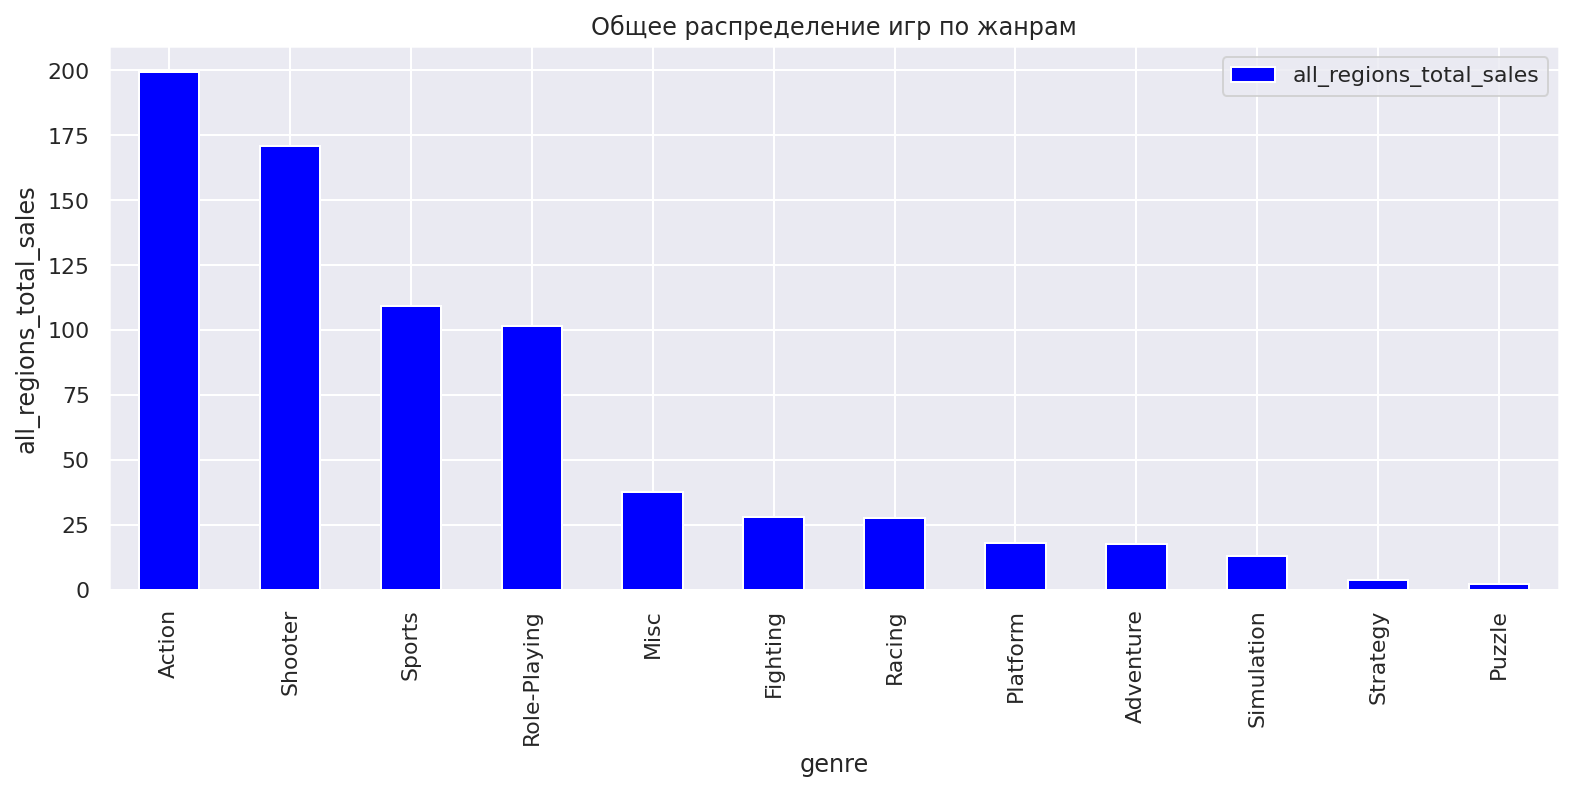

In [ ]:
# создадим новую переменную actual_genre,
# в которой сгруппируем датафрейм с информацией о суммарных глобальных продажах по жанрам
actual_genre = (actual_period_data
                .pivot_table(index='genre',
                             values='all_regions_total_sales', aggfunc='sum')
                .sort_values('all_regions_total_sales', ascending=False)
                .plot(y='all_regions_total_sales',
                      kind='bar',
                      figsize=(13, 5),
                      alpha=1,
                      grid=True,
                      color='blue',
                      title='Общее распределение игр по жанрам',
                      xlabel='genre',
                      ylabel='all_regions_total_sales')
               )

**Вывод:**

На графике распределения мы видим **два жанра-лидера с наибольшими глобальными продажами  - Action и Shooter, далее - Sports и Role-Playing**; самые низкие продажи у жанра - Puzzle  и Strategy.

*Посмотрим на самые прибыльные жанры*

In [ ]:
# отсортируем медианные глобальные продажи по жанрам по убыванию значения

actual_period_data.pivot_table(index='genre',
                               values='all_regions_total_sales',
                               aggfunc='median').sort_values('all_regions_total_sales', ascending=False)

,all_regions_total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


*Вывод: мы видим, что в тройке прибыльных лидеров жанры - Shooter, Sports и Platform*

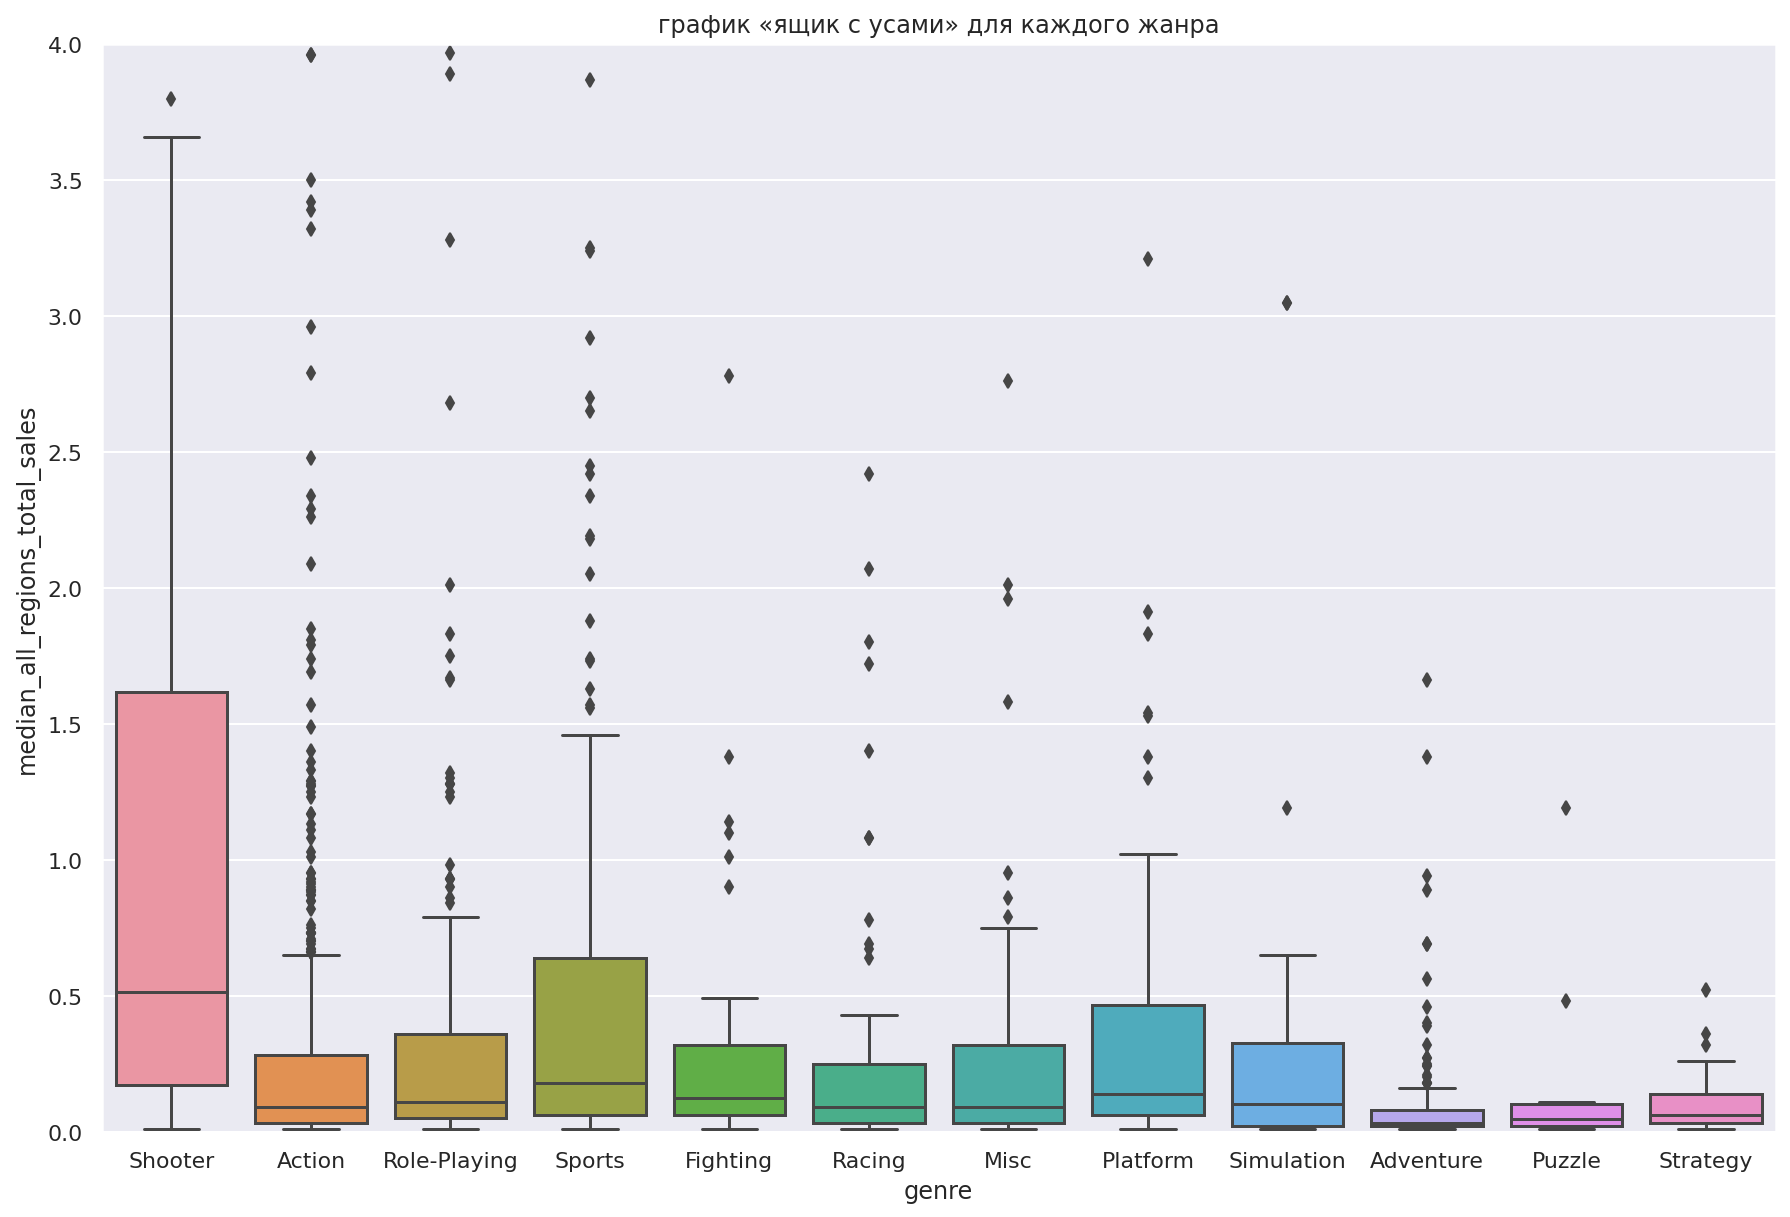

In [ ]:
# визуализируем результат, построим график «ящик с усами» по медианным глобальным продажам для каждого жанра в отдельности

plt.figure(figsize =(15, 10))
plt.ylim(0, 4)

sns.boxplot(x="genre", y="all_regions_total_sales",
            data=actual_period_data);
plt.ylabel('median_all_regions_total_sales')
plt.xlabel('genre')
plt.title('график «ящик с усами» для каждого жанра')
plt.show()

**Вывод:**

Медианные значения на диаграмме размаха подтверждают вывод о **самых прибыльных жанров - Shooter, Sports и Platform**.

### Составим портрет пользователя каждого региона

 **- Определим для пользователя каждого региона (NA, EU, JP):**

     - Самые популярные платформы (топ-5). Опишим различия в долях продаж.
     - Самые популярные жанры (топ-5). Поясним разницу.
     - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**- Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP); Опишим различия в долях продаж.**

In [ ]:
# объединим в переменную popular_platform - платформы по суммарным продажам в регионах NA, EU, JP

popular_platform = (actual_period_data
                    .pivot_table(index='platform',
                                 values=['all_regions_total_sales', 'na_sales', 'eu_sales', 'jp_sales'],
                                 aggfunc='sum')
                   )

# добавим долю продаж в процентах для каждого региона

popular_platform['%_na'] = round(popular_platform['na_sales'] / popular_platform['all_regions_total_sales']*100, 1)
popular_platform['%_eu'] = round(popular_platform['eu_sales'] / popular_platform['all_regions_total_sales']*100, 1)
popular_platform['%_jp'] = round(popular_platform['jp_sales'] / popular_platform['all_regions_total_sales']*100, 1)

popular_platform

,all_regions_total_sales,eu_sales,jp_sales,na_sales,%_na,%_eu,%_jp
platform,,,,,,,
3DS,86.68,16.12,44.24,22.64,26.1,18.6,51.0
PC,27.05,17.97,0.00,7.23,26.7,66.4,0.0
PS3,68.18,25.54,11.22,22.05,32.3,37.5,16.5
PS4,288.15,130.04,15.02,98.61,34.2,45.1,5.2
PSP,0.36,0.00,0.36,0.00,0.0,0.0,100.0
PSV,22.40,3.53,14.54,2.52,11.2,15.8,64.9
Wii,5.07,2.59,0.00,2.08,41.0,51.1,0.0
WiiU,42.98,13.15,7.31,19.36,45.0,30.6,17.0
X360,48.22,15.49,0.08,28.30,58.7,32.1,0.2


In [ ]:
# посмотрим на top-5 самых популярных платформ в регионе Северная Америка

popular_platform.sort_values(by='na_sales', ascending=False).head()

,all_regions_total_sales,eu_sales,jp_sales,na_sales,%_na,%_eu,%_jp
platform,,,,,,,
PS4,288.15,130.04,15.02,98.61,34.2,45.1,5.2
XOne,140.36,46.25,0.32,81.27,57.9,33.0,0.2
X360,48.22,15.49,0.08,28.30,58.7,32.1,0.2
3DS,86.68,16.12,44.24,22.64,26.1,18.6,51.0
PS3,68.18,25.54,11.22,22.05,32.3,37.5,16.5


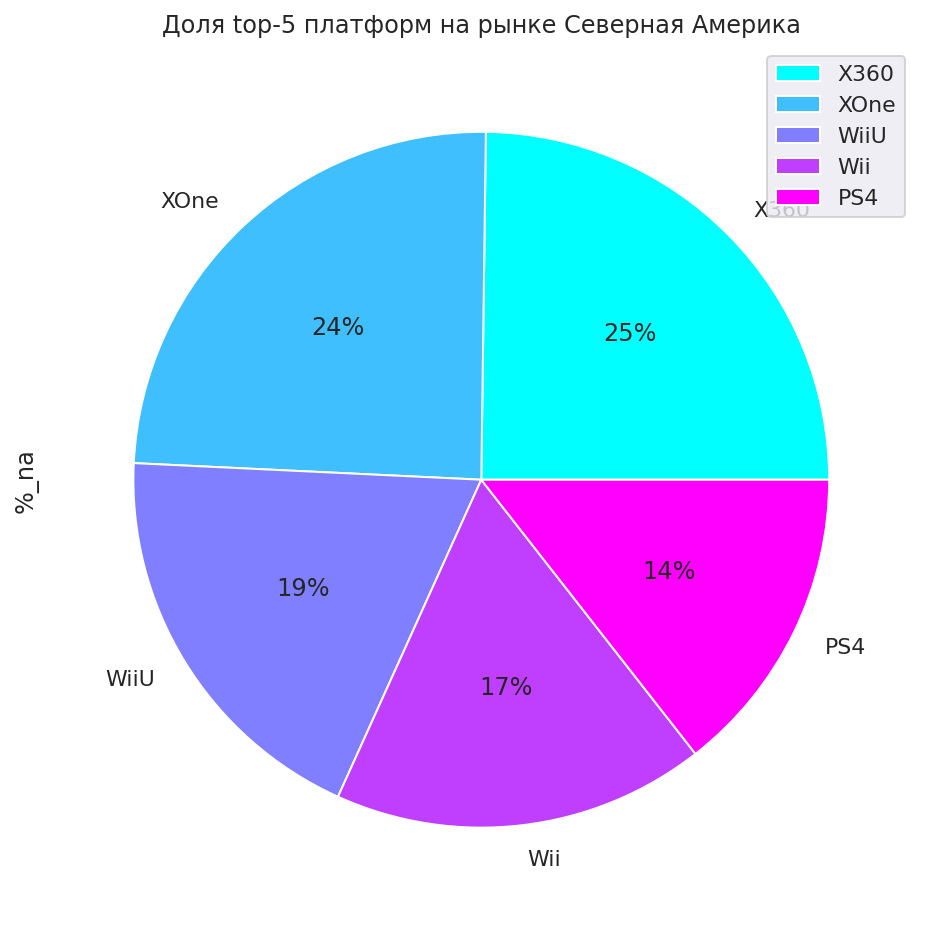

In [ ]:
# посмотрим на долю top-5 платформ на рынке Северная Америка с помощью круговой диаграммы

popular_platform.sort_values(by='%_na', ascending=False).head()['%_na']\
.plot(title = 'Доля top-5 платформ на рынке Северная Америка',
      kind='pie',
      legend=True,
      cmap='cool',
      autopct='%1.0f%%',
      figsize=(8,8));

**Вывод:**

**Top-5 самых популярных платформ в регионе Северная Америка** выглядит так:

   - PS4
   - XOne
   - X360
   - 3DS
   - PS3

**Доля top-5 платформ на рынке Северная Америка (от общего объема глобальных продаж)** выглядет так:

   - X360
   - XOne
   - WiiU
   - Wii
   - PS4

Различия top-5 платформ в долях продаж возможно объясняется жизненным циклом платформ.

Доля продаж top-5 платформ северно-американском рынке распределена достаточно равномерно, что говорит об очень высокой конкуренции.

In [ ]:
# посмотрим на top-5 самых популярных платформ в регионе Европа

popular_platform.sort_values(by='eu_sales', ascending=False).head()

,all_regions_total_sales,eu_sales,jp_sales,na_sales,%_na,%_eu,%_jp
platform,,,,,,,
PS4,288.15,130.04,15.02,98.61,34.2,45.1,5.2
XOne,140.36,46.25,0.32,81.27,57.9,33.0,0.2
PS3,68.18,25.54,11.22,22.05,32.3,37.5,16.5
PC,27.05,17.97,0.00,7.23,26.7,66.4,0.0
3DS,86.68,16.12,44.24,22.64,26.1,18.6,51.0


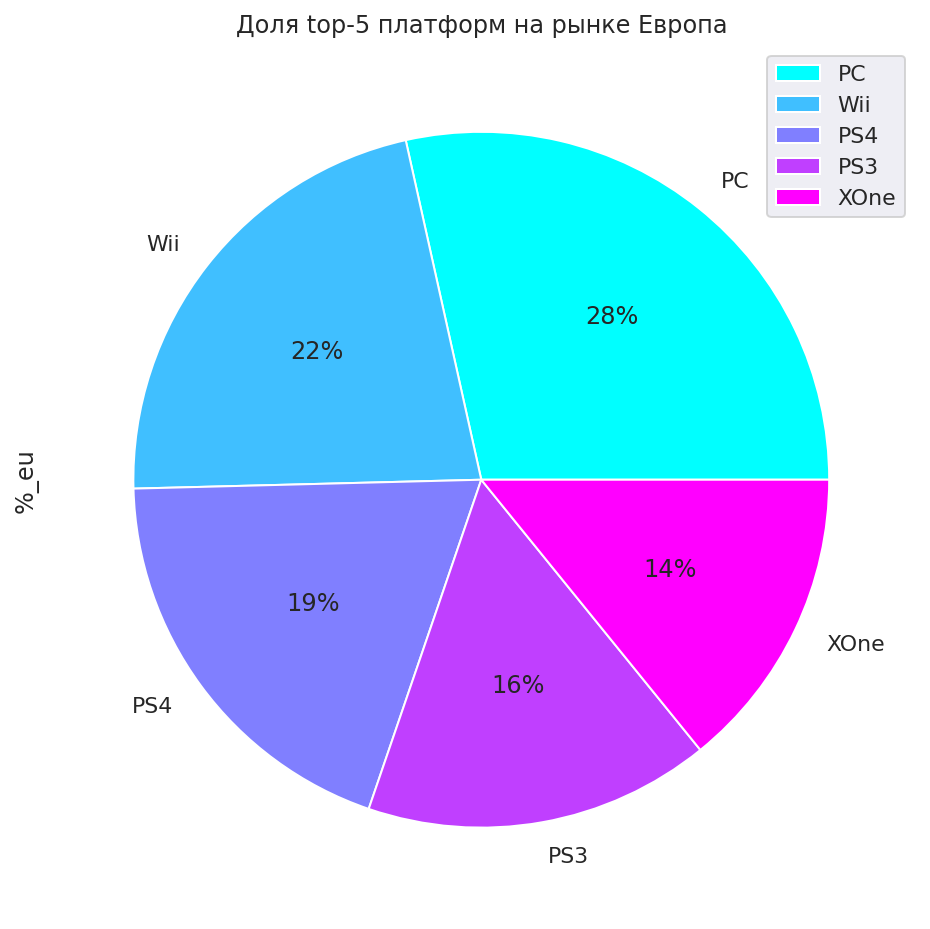

In [ ]:
# визуализируем долю top-5 платформ на рынке Европа с помощью круговой диаграммы

popular_platform.sort_values(by='%_eu', ascending=False).head()['%_eu']\
.plot(title = 'Доля top-5 платформ на рынке Европа',
      kind='pie',
      legend=True,
      cmap='cool',
      autopct='%1.0f%%',
      figsize=(8,8));

**Вывод:**

**Top-5 самых популярных платформ в регионе Европа** выглядит так:

 - PS4
 - XOne
 - PS3    
 - PC    
 - 3DS    

**Доля top-5 платформ на рынке Европы (от общего объема глобальных продаж)** выглядет так:

 - PC
 - Wii
 - PS4    
 - PS3
 - XOne

Различия top-5 платформ в долях продаж возможно объясняется жизненным циклом платформ.

В топе самых популярных платформ в Европе, как и в Северной Америке, PS4 и XOne - на двух первых местах.

Доля продаж top-5 платформ на европейском рынке распределена относительно равномерно, что также говорит о высокой конкуренции.

In [ ]:
# посмотрим на top-5 самых популярных платформ в регионе Япония

popular_platform.sort_values(by='jp_sales', ascending=False).head()

,all_regions_total_sales,eu_sales,jp_sales,na_sales,%_na,%_eu,%_jp
platform,,,,,,,
3DS,86.68,16.12,44.24,22.64,26.1,18.6,51.0
PS4,288.15,130.04,15.02,98.61,34.2,45.1,5.2
PSV,22.40,3.53,14.54,2.52,11.2,15.8,64.9
PS3,68.18,25.54,11.22,22.05,32.3,37.5,16.5
WiiU,42.98,13.15,7.31,19.36,45.0,30.6,17.0


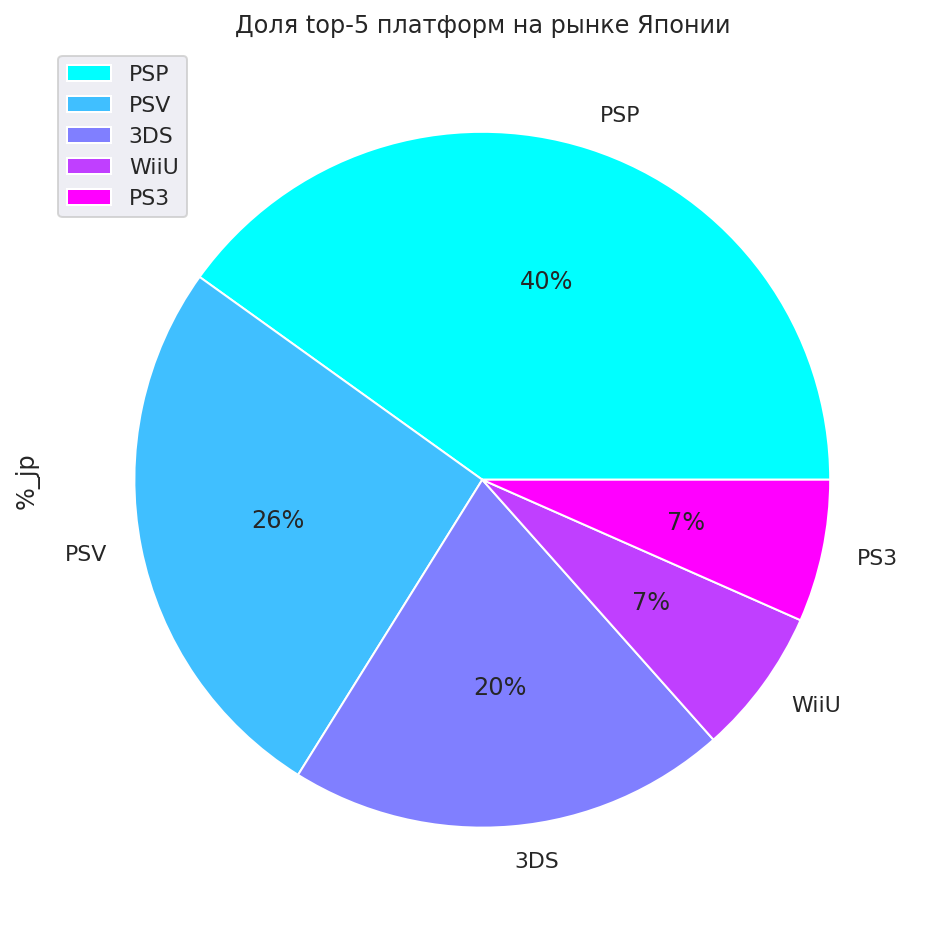

In [ ]:
# визуализируем долю top-5 платформ на рынке Японии с помощью круговой диаграммы

popular_platform.sort_values(by='%_jp', ascending=False).head()['%_jp']\
.plot(title = 'Доля top-5 платформ на рынке Японии',
      kind='pie',
      legend=True,
      cmap='cool',
      autopct='%1.0f%%',
      figsize=(8,8));

**Вывод:**

**Top-5 самых популярных платформ в регионе Япония** выглядит так:

 - 3DS
 - PS4
 - PSV    
 - PS3    
 - WiiU   

**Доля top-5 платформ на рынке Японии (от общего объема глобальных продаж)** выглядет так:

 - PSP
 - PSV
 - 3DS    
 - WiiU
 - PS3

Различия top-5 платформ в долях продаж возможно объясняется жизненным циклом платформ.

Самую большую долю на японском рынке занимает платформа PSP, затем PSV и 3DS, это национальные японские платформы.

**- Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP). Поясним разницу.**

In [ ]:
# объединим в переменную na_popular_genre самые популярные жанры (топ-5) по суммарным глобальным продажам в регионе NA

na_popular_genre = (actual_period_data
                    .pivot_table(index='genre',
                                 values=['na_sales'],
                                 aggfunc='sum')
                    .sort_values(by='na_sales',ascending=False).head(5)
                   )
na_popular_genre

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [ ]:
# проверим полученный список

list(na_popular_genre.index)

['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc']

In [ ]:
# объединим в переменную na_popular_genre самые популярные жанры (топ-5) по суммарным глобальным продажам в регионе EU

eu_popular_genre = (actual_period_data
                    .pivot_table(index='genre',
                                 values=['eu_sales'],
                                 aggfunc='sum')
                    .sort_values(by='eu_sales',ascending=False).head(5)
                   )
eu_popular_genre

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [ ]:
# объединим в переменную na_popular_genre самые популярные жанры (топ-5) по суммарным глобальным продажам в регионе JP

jp_popular_genre = (actual_period_data
                    .pivot_table(index='genre',
                                 values=['jp_sales'],
                                 aggfunc='sum')
                    .sort_values(by='jp_sales',ascending=False).head(5)
                   )
jp_popular_genre

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


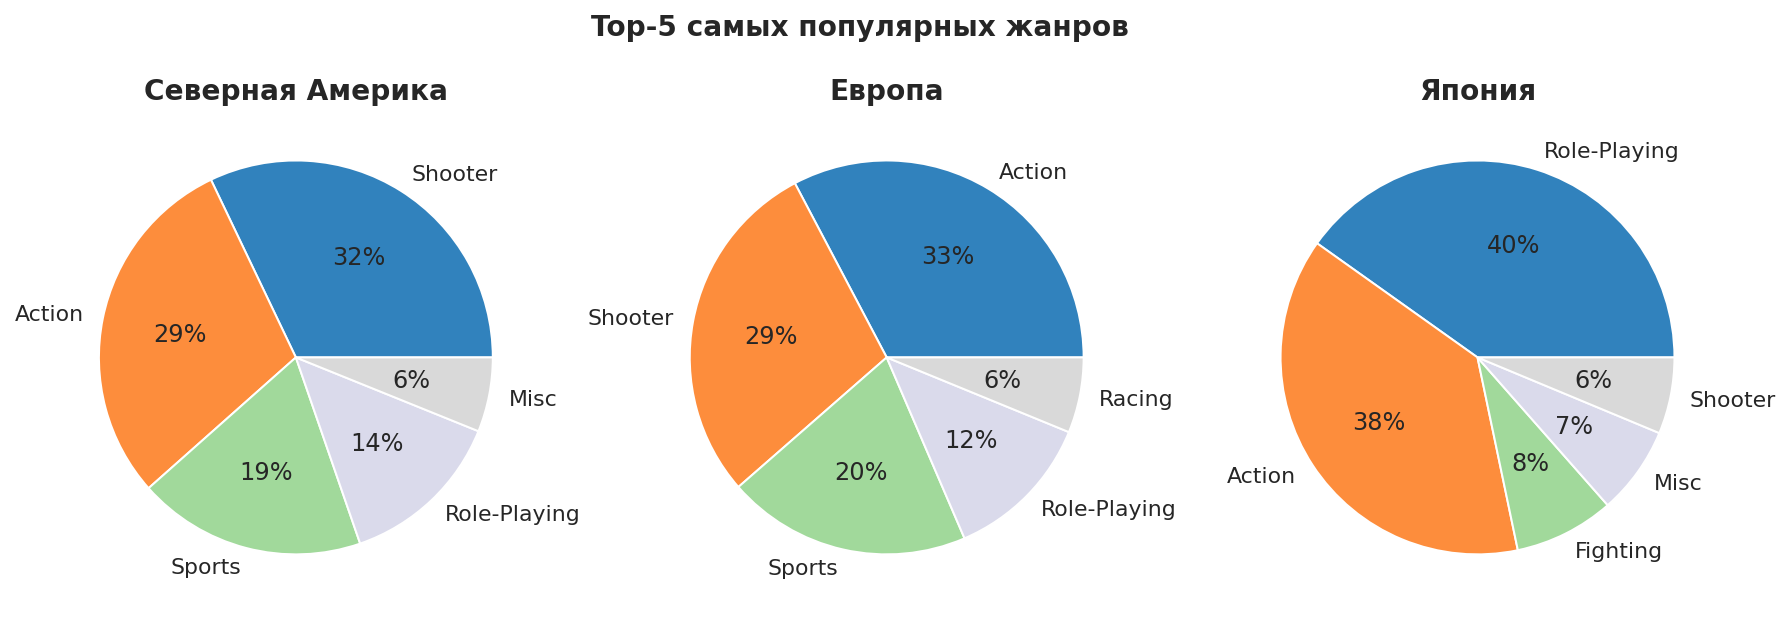

In [ ]:
# визуализируем top-5 самых популярных жанров для пользователя каждого региона (NA, EU, JP) с помощью круговой диаграммы

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax.axis('equal')

labels = list(na_popular_genre.index)
ax1.pie(na_popular_genre['na_sales'], labels= labels, colors=outer_colors, autopct='%1.0f%%')
ax1.set_title('Северная Америка', fontsize = 14, fontweight='bold')

labels = list(eu_popular_genre.index)
ax2.pie(eu_popular_genre['eu_sales'], labels= labels, colors=outer_colors, autopct='%1.0f%%')
ax2.set_title('Европа', fontsize = 14, fontweight='bold')


labels = list(jp_popular_genre.index)
ax3.pie(jp_popular_genre['jp_sales'],labels= labels, colors=outer_colors, autopct='%1.0f%%')
ax3.set_title('Япония', fontsize = 14, fontweight='bold')
fig.suptitle('Top-5 самых популярных жанров', fontsize = 14, fontweight='bold')

plt.show()

**Вывод:**

На графике видно, что **у top-5 самых популярных жанров есть общие жанры в каждом регионе (NA, EU, JP) - Shooter, Action, Role-Playing**.

Жанр Misc популярен только в Северной Америке; жанр Racing - только в Европе; жанр Fighting - только в Японии.

Наиболее похожи между собой вкусы пользователей регионов Северная Америка и Европа. Вкусы пользователей региона Японии отличаются, интересно, что в топ Японии не вошел жанр Sports.

**- Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [ ]:
# создадим переменную rating_impact, в которой сгруппируем суммарные продажи в регионах NA, EU, JP по рейтингу ESRB

rating_impact = (actual_period_data
                    .pivot_table(index='rating',
                                 values=['all_regions_total_sales', 'na_sales', 'eu_sales', 'jp_sales'],
                                 aggfunc='sum')
                   )

# добавим долю продаж в процентах для каждого региона

rating_impact['%_na'] = round(rating_impact['na_sales'] / rating_impact['all_regions_total_sales']*100, 1)
rating_impact['%_eu'] = round(rating_impact['eu_sales'] / rating_impact['all_regions_total_sales']*100, 1)
rating_impact['%_jp'] = round(rating_impact['jp_sales'] / rating_impact['all_regions_total_sales']*100, 1)

rating_impact


,all_regions_total_sales,eu_sales,jp_sales,na_sales,%_na,%_eu,%_jp
rating,,,,,,,
E,133.13,58.06,8.94,50.74,38.1,43.6,6.7
E10+,71.68,26.16,4.46,33.23,46.4,36.5,6.2
M,226.54,93.44,8.01,96.42,42.6,41.2,3.5
T,99.13,34.07,14.78,38.95,39.3,34.4,14.9
unknown,198.97,58.95,56.90,64.72,32.5,29.6,28.6


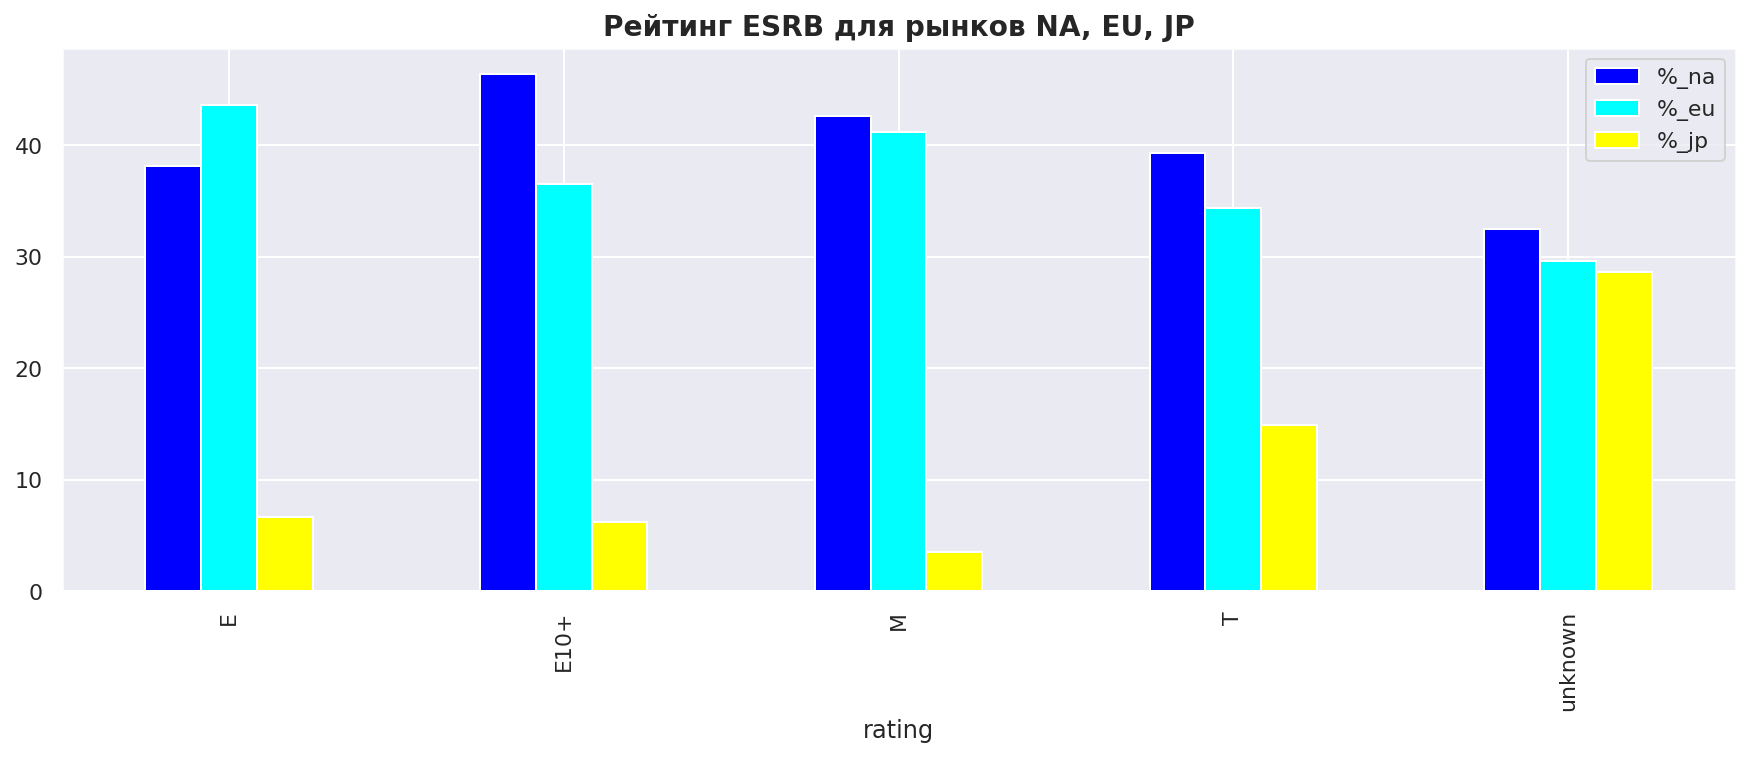

In [ ]:
# посмотрим на распределение рейтинга ESRB для рынка каждого региона NA, EU, JP

my_color =['blue', 'cyan', 'yellow']
rating_impact.plot(kind='bar', y=['%_na', '%_eu', '%_jp'], figsize=(15,5), color=my_color)
plt.title('Рейтинг ESRB для рынков NA, EU, JP', fontsize = 14, fontweight='bold')
plt.show()

**Вывод:**

Посмотрим еще раз на расшифровку знаков рейтинга, чтобы сделать вывод:

 - «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

Подробнее на [Wiki](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

Проанализировав график распределения можно сделать вывод, распределение продаж по рейтингам ESRB на рынке Японии очень отличается от рынков Европы и Северной Америки.

На рынке в Северной Америке лучше всего продаются игры возрастной категории E10+, M, то есть для подростков от 10 лет и для взрослых, похожая ситуаци и на рынке Европы. Подозрительно маленькая доля на рынке в Японии. Если обратиться к определению ESRB, то станет понятно, что это организация определяет возрастной рейтинг компьютерных игр в США и Канаде! В Японии и в Европе существуют собственные похожие ассоциации, определяющие возрастной рейтинг:
  - PEGI — европейская рейтинговая система компьютерных и видеоигр
  - CERO — японская рейтинговая организация

Поэтому 40% пропущенных значений рейтинга ESRB (сгруппированы в столбец unknown в нашей таблице) возможно означают, что игры произведены не в регионе Северная Америка.

### Проверим гипотезы

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Задайте самостоятельно пороговое значение alpha.
 - Поясним:
     - Как мы сформулировали нулевую и альтернативную гипотезы;
     - Какой критерий применили для проверки гипотез и почему.

**Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

Для начала сформулируем нулевую гипотезу(H_0) о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативную гипотезу (H_1) формулируем исходя из нулевой гипотезы соответственно. Данная гипотеза является двусторонней. Нулевую гипотезу сформулируем так, чтобы использовать знак равенства.
Критический уровень значимости alpha зададим в значении 5%.

Для проверки гипотезы будем использовать данные о среднем значении двух ГС с помощью метода scipy.stats.ttest.ind() Массив данных - выборка по каждой из платформ. Для оценки будем использовать критерий двустороннее значение p-value - вероятность получить одинаковые рейтинги.

```
H_0: Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC
H_a: Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC
alpha = 0.05
```

In [ ]:
# выведем названия платформ из актуального датафрейма

actual_period_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [ ]:
xone = actual_period_data[(actual_period_data['platform'] == 'XOne')&(actual_period_data['user_score'] != 0)]['user_score']

In [ ]:
pc = actual_period_data[(actual_period_data['platform'] == 'PC')&(actual_period_data['user_score'] != 0)]['user_score']

In [ ]:
# Посмотрим дисперсию значений двух выборок

print(np.var(xone), np.var(pc))

1.8795460055096425 2.8773743617307175


*Делаем вывод, что наши выборки разного размера, соответственно будем использовать параметр equal_var=False при проверки гипотез*

In [ ]:
# зададим значение уровня значимости равным 5%
alpha = 0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(xone, pc, equal_var=False)

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Мы видим, что полученное значение p-value больше критического уровня статистической значимости, поэтому у нас не получилось отвергнуть нулевую гипотезу, то есть утверждение о том, что средние рейтинги одинаковы верно.

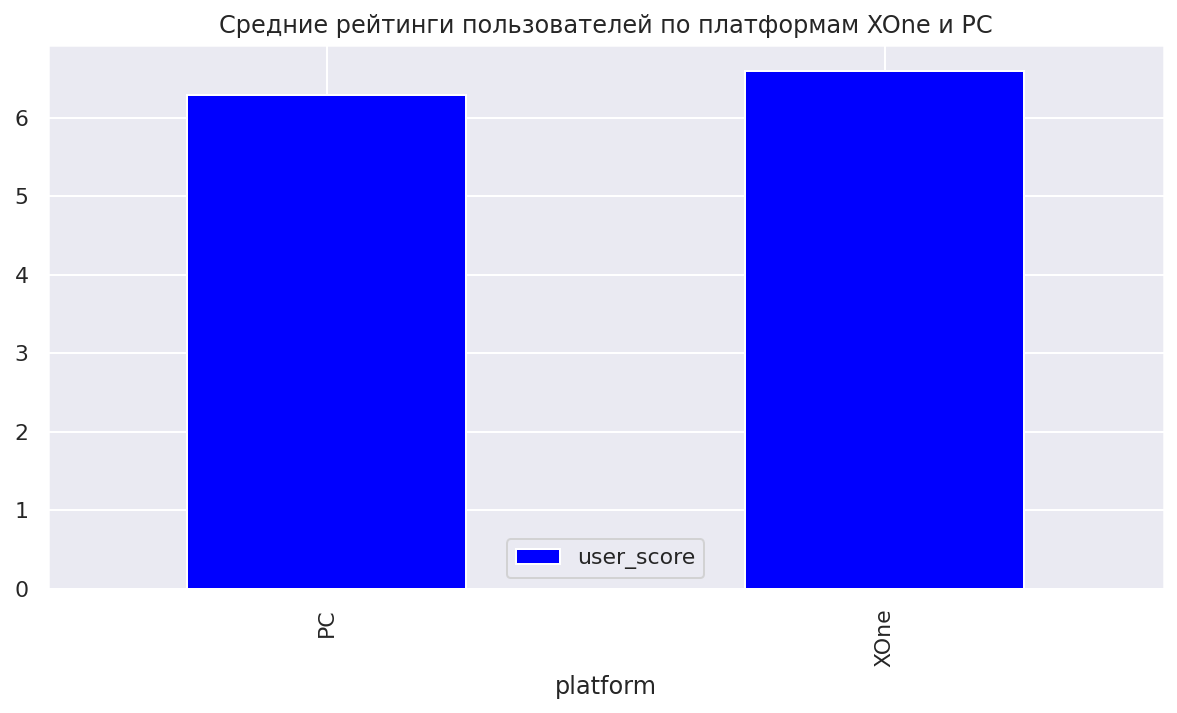

In [ ]:
# построим столбчатую диаграмму средних рейтингов пользователей по платформам Xbox One и PC

actual_period_data[(actual_period_data['platform'].isin(['XOne', 'PC']))&(actual_period_data['user_score'] != 0)].pivot_table(
    index='platform',
    values='user_score').plot(
    kind='bar',
    grid=True,
    figsize=(10, 5),
    color='blue',
    title='Средние рейтинги пользователей по платформам XOne и PC')
plt.show()

*Мы видим, что полученные на диаграмме значения не противоречат расчитанной вероятности.*

**Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;**

Для начала сформулируем нулевую гипотезу(H_0) так, чтобы использовать знак равенства. Альтернативную гипотезу (H_1) формулируем исходя из нулевой гипотезы соответственно. Данная гипотеза является двусторонней.
Критический уровень значимости alpha зададим в значении 5%.

Для проверки гипотезы будем использовать данные о среднем значении двух ГС с помощью метода scipy.stats.ttest.ind() Массив данных - выборка по каждому жанру. Для оценки будем использовать критерий двустороннее значение p-value - вероятность получить одинаковые рейтинги.

```
H_0: Средние пользовательские рейтинги жанров Action = Средние пользовательские рейтинги жанров Sports
H_a: Средние пользовательские рейтинги жанров Action ≠ Средние пользовательские рейтинги жанров Sports
alpha = 0.05
```

In [ ]:
# выведем названия жанров из актуального датафрейма

actual_period_data['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

In [ ]:
action = actual_period_data[(actual_period_data['genre'] == 'Action')&(actual_period_data['user_score'] != 0)]['user_score']

In [ ]:
sports = actual_period_data[(actual_period_data['genre'] == 'Sports')&(actual_period_data['user_score'] != 0)]['user_score']

In [ ]:
# Посмотрим дисперсию значений двух совокупностей

print(np.var(action), np.var(sports))

1.89208448117539 3.4198375596751185


*Делаем вывод, что наши выборки разного размера, соответственно будем использовать параметр equal_var=False при проверки гипотез*

In [ ]:
# зададим значение уровня значимости равным 5%
alpha = 0.05

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(action, sports, equal_var=False)

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:**

У нас получилось отвергнуть нулевую гипотезу о том, что средние рейтинги жанров Action и Sports одинаковы, так как полученное значение p-value меньше критического уровня статистической значимости. Таким образом, средние рейтинги жанров Action и Sports разные.

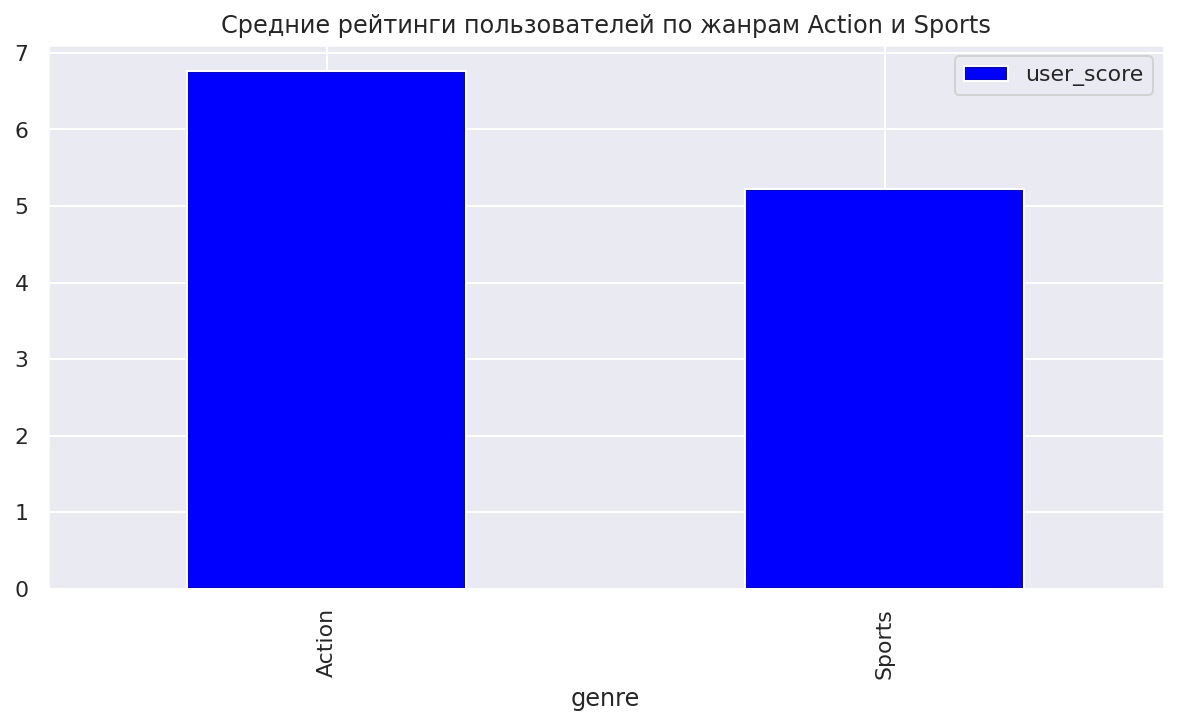

In [ ]:
# построим столбчатую диаграмму средних рейтингов пользователей по жанрам  Action и Sports

actual_period_data[(actual_period_data['genre'].isin(['Action', 'Sports']))&(actual_period_data['user_score'] != 0)].pivot_table(
    index='genre',
    values='user_score').plot(
    kind='bar',
    grid=True,
    figsize=(10, 5),
    color='blue',
    title='Средние рейтинги пользователей по жанрам Action и Sports')
plt.show()

*Мы видим, что полученные на диаграмме значения не противоречат расчитанной вероятности, а подтверждают ее. Средний рейтинг жанра Action выше чем у жанра Sports.*

### Общий вывод

**1. В ходе работы была выполнена подготовка данных** - названия столбцов приведены к нижнему регистру, преобразован тип данных некоторых столбцов, обработаны пропуски, проведена проверка на дубликаты, созданы необходимые дополнительные столбцы. В результате мы удалили около 2% данных.

**2. В ходе исследования было проанализировано сколько игр выпускалось в разные годы.**

Рост выпуска игр начинается только с 1994 года. Пик выпуска игр приходится на 2008-2009 годы. С 2009 года идёт постепенное снижение количества выпускаемых игр, резкий спад релиза пришелся на 2012 год. Возможно это связано с развитием мобильных игр в приложениях смартфонов и ростом популярности социальных сетей, особенно после выхода iphone(первая модель вышла в 2007 году).

**3. В рамках исследования также были проанализированы глобальные продажи top-10 платформ по годам.**

**Средний период жизненного цикла платформ 9-11 лет. Также можно увидеть резкий рост в течение 2-3 лет, небольшой период стабильности около 2-4 лет, и далее резкое падение**. Большинство top-10 платформ, в том числе самая популярная платформа PS2 - около 200 млн. суммарных продаж в 2004 году, к сожалению, не дожили до актуального для нас периода, до 2016 года.
Интересно наблюдать появление новых платформ и исчезание старых на примере PS(бренд Sony). **Появление нового продукта происходит каждые 6 лет**, самая последняя версия PS4 вышла в 2013 году.
Очевидно, что **такие платформы как - X360, PS3, Wii - находятся в конечной стадии жизненного цикла. Платформа 3DS появилась в 2011 году, однако нельзя сказать, что она является очень перпективной, так как на графике видно падение продаж с 2014 года;
Таким образом, **PS4 - самая интересная и перспективная платформа из списка top-10. Платформа появилась в 2013 году и показывает рост продаж в 2014 -2015 годах.**

**4. Был определен актуальный период для планирования рекламной кампании на 2017 год - данные за последние 3 года, с 2014 по 2016 год.

**5. Были проанализированы потенциально прибыльные платформы, а также платформы-лидеры по продажам.**

Платформы - PS4 и XOne - показывали рост продаж в 2014 - 2015, однако, в 2016 году обе платформы упали. Остальные платформы, очевидно, имеют более долгий жизненный цикл и показывают падение с 2014 года.
Таким образом, **PS4 и XOne являются наиболее перспективными и потенциально прибыльными для планирования кампании на 2017 год.**

**6. Был построен график «ящик с усами» по глобальным в разбивке по платформам.**

На графике видно, что у некоторых платформ размах "усов", медиана, и Q1/Q3 квартили - почти идентичны. Так например, у платформ PS4 и XOne, похожая ситуация у платформ WiiU и X36, и у 3DS и PC. Можно предположить, что это означает, что у данных пар платформ похожее положение на глобальном рынке, т.е такие платформы прямые конкуренты друг-другу.
**Лидируют по глобальным продажам платформы PS4 и XOne, совсем упали продажи у платформы PSP.**

**7. В ходе исследования было проанализировано влияние отзывов пользователей и критиков на продажи внутри платформы PS4. В результате сильной взаимосвязи продаж от отзывов внутри платформы PS4 не выявлено.**

**8. При анализе влияния отзывов пользователей и критиков на продажи внутри остальных актуальных платформ, вывод об отсутствии сильной взаимосвязи продаж от каких-либо отзывов подтверждается**. Отметим только, что взаимосвязь продаж от отзывов критиков немного больше.

**9. В рамках исследования было проанализировано распределение игр по жанрам.**

**По глобальным продажам есть жанра-лидеры - Action и Shooter, далее - Sports и Role-Playing**; самые низкие продажи у жанра - Puzzle и Strategy.
**Самыми прибыльными жанрами оказалась тройка лидеров - Shooter, Sports и Platform.**

10. В ходе исследования мы составили портрет пользователя каждого региона (NA, EU, JP).

 - Проанализированы top-5 самых популярных платформ для каждого региона.

**Регион NA:**
**Top-5 самых популярных платформ в регионе Северная Америка выглядит так**:

   - PS4
   - XOne
   - X360
   - 3DS
   - PS3

**Доля top-5 платформ на рынке Северная Америка (от общего объема глобальных продаж) выглядет так**:

   - X360
   - XOne
   - WiiU
   - Wii
   - PS4

Доля продаж top-5 платформ северно-американском рынке распределена достаточно равномерно, что говорит об очень высокой конкуренции.

**Регион EU:**
**Top-5 самых популярных платформ в регионе Европа выглядит так:**

   - PS4
   - XOne
   - PS3
   - PC
   - 3DS

**Доля top-5 платформ на рынке Европы (от общего объема глобальных продаж) выглядет так:**

   - PC
   - Wii
   - PS4
   - PS3
   - XOne
   
В топе самых популярных платформ в Европе, как и в Северной Америке, PS4 и XOne - на двух первых местах.
Доля продаж top-5 платформ на европейском рынке распределена относительно равномерно, что также говорит о высокой конкуренции.

**Регион JP:**
**Top-5 самых популярных платформ в регионе Япония выглядит так:**

   - 3DS
   - PS4
   - PSV
   - PS3
   - WiiU

**Доля top-5 платформ на рынке Японии (от общего объема глобальных продаж) выглядет так:**

   - PSP
   - PSV
   - 3DS
   - WiiU
   - PS3

Самую большую долю на японском рынке занимает платформа PSP, затем PSV и 3DS, это национальные японские платформы.

 - Проанализированы top-5 самых популярных жанров для каждого региона.

У top-5 самых популярных жанров есть **общие жанры в каждом регионе (NA, EU, JP) - Shooter, Action, Role-Playing**.

Жанр Misc популярен только в Северной Америке; жанр Racing - только в Европе; жанр Fighting - только в Японии.
Наиболее похожи между собой вкусы пользователей регионов Северная Америка и Европа. Вкусы пользователей региона Японии отличаются, интересно, что в топ Японии не вошел жанр Sports.

 - Проанализировано влияение рейтинга ESRB на продажи в отдельном регионе.

Распределение продаж по рейтингам ESRB на рынке Японии очень отличается от рынков Европы и Северной Америки.
На рынке в Северной Америке лучше всего продаются игры возрастной категории E10+, M, то есть для подростков от 10 лет и для взрослых, похожая ситуаци и на рынке Европы. Подозрительно маленькая доля на рынке в Японии. Если обратиться к определению ESRB, то станет понятно, что это организация определяет возрастной рейтинг компьютерных игр в США и Канаде! В Японии и в Европе существуют собственные похожие ассоциации, определяющие возрастной рейтинг:

  - PEGI — европейская рейтинговая система компьютерных и видеоигр
  - CERO — японская рейтинговая организация
Поэтому 40% пропущенных значений рейтинга ESRB возможно означают, что игры произведены не в регионе Северная Америка.

11. В рамках исследования проведена проверка двух основных гипотез.

  - Первая нулевая гипотеза утверждает, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
В результате проверки, у нас не получилось отвергнуть нулевую гипотезу.

   - Вторая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.
В результате проверки, у нас получилось отвергнуть нулевую гипотезу о том, что средние рейтинги жанров Action и Sports одинаковы. Разные средние пользовательские рейтинги жанров Action и Sports подтвердились графике распределения рейтингов пользователей по жанрам.